#### To create a model which able to predict intents of a sentence. There will be four kind of intents will be there seller, buyer, neutral and seller buyer. The data is unlabeled having noise data and different types of sentences are present having links and other description.

In [7]:
#importing neccessary libraries
import re
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data] 

[nltk_data]    |   Package moses_sample is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefix

[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package univ

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/out.csv")
df.head()

,_id,Id,GroupId,GroupName,PostId,PostType,UserProfileId,ProfileName,ProfileImage,ProfileImageOriginal,...,NoOfComment,NoOfShare,DateTimeOfPost,connectionStatus,postUrl,DestinationURL,savePostDateTimeUtc,mediaPostUrlUpdated,CommentDetails,HashTag
0,"{""$oid"":""5b1aa7ee8bb55b300895a775""}",5b1aa7ee8bb55b300895a774,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2171117736262189""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,...,0,0,1528458840,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN
1,"{""$oid"":""5b1aa7ee8bb55b300895a777""}",5b1aa7ee8bb55b300895a776,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2170670772973552""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,...,0,0,1528428573,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN
2,"{""$oid"":""5b1aa7ee8bb55b300895a779""}",5b1aa7ee8bb55b300895a778,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2170408029666493""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,...,0,0,1528412555,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN
3,"{""$oid"":""5b1aa7ee8bb55b300895a77b""}",5b1aa7ee8bb55b300895a77a,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2169907019716594""}",IMAGE,100000659454027,Gian Fortuin,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,...,4,0,1528381983,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN
4,"{""$oid"":""5b1aa7ee8bb55b300895a77d""}",5b1aa7ee8bb55b300895a77c,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2169711059736190""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,...,0,0,1528371412,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN


In [5]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df.head(10)

,_id,Id,GroupId,GroupName,PostId,PostType,UserProfileId,ProfileName,ProfileImage,ProfileImageOriginal,Message,FeedText,FeedDescription,FeedTitle,postImgUrl,postImgUrlOriginal,videoTitle,VideoSiteRedirectionUrl,VideoDescription,PostRedirectionImg,websiteUrl,NoOfLike,NoOfComment,NoOfShare,DateTimeOfPost,connectionStatus,postUrl,DestinationURL,savePostDateTimeUtc,mediaPostUrlUpdated,CommentDetails,HashTag
0,"{""$oid"":""5b1aa7ee8bb55b300895a775""}",5b1aa7ee8bb55b300895a774,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2171117736262189""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,Youre about to GET LUCKY! Rise and shine. HAP...,Youre about to GET LUCKY! Rise and shine. HAPP...,NaN,NaN,https://api.socioleadspro.com/api/Media/get?id...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-0/...,NaN,NaN,NaN,NaN,NaN,0,0,0,1528458840,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN
1,"{""$oid"":""5b1aa7ee8bb55b300895a777""}",5b1aa7ee8bb55b300895a776,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2170670772973552""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,"Rest up, tomorrows a BIG DAY.\r\n You&#039;re...","Rest up, tomorrows a BIG DAY.\r\n You&#039;re ...",NaN,NaN,https://api.socioleadspro.com/api/Media/get?id...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-9/...,NaN,NaN,NaN,NaN,NaN,0,0,0,1528428573,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN
2,"{""$oid"":""5b1aa7ee8bb55b300895a779""}",5b1aa7ee8bb55b300895a778,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2170408029666493""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,Start PRESSING with FORWARD moving people!\r\...,Start PRESSING with FORWARD moving people!\r\n...,NaN,NaN,https://api.socioleadspro.com/api/Media/get?id...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-0/...,NaN,NaN,NaN,NaN,NaN,0,0,0,1528412555,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN
3,"{""$oid"":""5b1aa7ee8bb55b300895a77b""}",5b1aa7ee8bb55b300895a77a,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2169907019716594""}",IMAGE,100000659454027,Gian Fortuin,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,Everyone can do it as the work required to ea...,Everyone can do it as the work required to ear...,NaN,NaN,https://api.socioleadspro.com/api/Media/get?id...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-9/...,NaN,NaN,NaN,NaN,NaN,0,4,0,1528381983,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN
4,"{""$oid"":""5b1aa7ee8bb55b300895a77d""}",5b1aa7ee8bb55b300895a77c,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2169711059736190""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,You have a habit of waking up every morning t...,You have a habit of waking up every morning to...,NaN,NaN,https://api.socioleadspro.com/api/Media/get?id...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-0/...,NaN,NaN,NaN,NaN,NaN,0,0,0,1528371412,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN
5,"{""$oid"":""5b1aa7ee8bb55b300895a77f""}",5b1aa7ee8bb55b300895a77e,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2169389989768297""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,"Thats YOU!\r\n Running from the masses, diggi...","Thats YOU!\r\n Running from the ma

### 1. Data Analysis

#### Checking shape

In [6]:
print(df.shape) # checking size of the dataset

(201886, 32)


#### Checking columns

In [13]:
df.columns

Index(['_id', 'Id', 'GroupId', 'GroupName', 'PostId', 'PostType',
       'UserProfileId', 'ProfileName', 'ProfileImage', 'ProfileImageOriginal',
       'Message', 'FeedText', 'FeedDescription', 'FeedTitle', 'postImgUrl',
       'postImgUrlOriginal', 'videoTitle', 'VideoSiteRedirectionUrl',
       'VideoDescription', 'PostRedirectionImg', 'websiteUrl', 'NoOfLike',
       'NoOfComment', 'NoOfShare', 'DateTimeOfPost', 'connectionStatus',
       'postUrl', 'DestinationURL', 'savePostDateTimeUtc',
       'mediaPostUrlUpdated', 'CommentDetails', 'HashTag'],
      dtype='object')

In [14]:
df.dtypes  # checking datatypes of the dataset

_id                         object
Id                          object
GroupId                     object
GroupName                   object
PostId                      object
PostType                    object
UserProfileId               object
ProfileName                 object
ProfileImage                object
ProfileImageOriginal        object
Message                     object
FeedText                    object
FeedDescription             object
FeedTitle                   object
postImgUrl                  object
postImgUrlOriginal          object
videoTitle                 float64
VideoSiteRedirectionUrl    float64
VideoDescription           float64
PostRedirectionImg         float64
websiteUrl                 float64
NoOfLike                     int64
NoOfComment                  int64
NoOfShare                    int64
DateTimeOfPost               int64
connectionStatus              bool
postUrl                     object
DestinationURL              object
savePostDateTimeUtc 

#### Observations: - 
   -  ['NoOfLike', 'NoOfComment', 'NoOfShare', 'DateTimeOfPost',
       'connectionStatus', 'savePostDateTimeUtc', 'mediaPostUrlUpdated'] dataset are of float types.
    
   - ['_id', 'Id', 'GroupId', 'GroupName', 'PostId', 'PostType',
       'UserProfileId', 'ProfileName', 'ProfileImage', 'ProfileImageOriginal',
       'Message', 'FeedText', 'postImgUrl', 'postImgUrlOriginal', 'postUrl'] dataset are of object types.
    

#### Checking Null Values

In [15]:
df.isnull().sum()/len(df)*100 #checking null values percentage

_id                          0.000000
Id                           0.000000
GroupId                      0.000000
GroupName                    0.014860
PostId                       0.000000
PostType                     0.000000
UserProfileId                0.000000
ProfileName                  0.091141
ProfileImage                 0.000000
ProfileImageOriginal         0.000000
Message                      0.000000
FeedText                    17.323638
FeedDescription             58.203640
FeedTitle                   75.452483
postImgUrl                  29.739556
postImgUrlOriginal          29.739556
videoTitle                 100.000000
VideoSiteRedirectionUrl    100.000000
VideoDescription           100.000000
PostRedirectionImg         100.000000
websiteUrl                 100.000000
NoOfLike                     0.000000
NoOfComment                  0.000000
NoOfShare                    0.000000
DateTimeOfPost               0.000000
connectionStatus             0.000000
postUrl     

#### Replacing blank spaces with NaN values

In [7]:
for i in df.columns:
    df[i][df[i].apply(lambda i: True if re.search('^\s*$', str(i)) else False)]=None

In [8]:
df.isnull().sum()/len(df)*100 #checking null values percentage again

_id                          0.000000
Id                           0.000000
GroupId                      0.000000
GroupName                    0.014860
PostId                       0.000000
PostType                     0.000000
UserProfileId                0.000000
ProfileName                  0.091141
ProfileImage                 0.000000
ProfileImageOriginal         0.000000
Message                      4.205839
FeedText                    17.830360
FeedDescription             58.203640
FeedTitle                   75.452483
postImgUrl                  29.739556
postImgUrlOriginal          29.739556
videoTitle                 100.000000
VideoSiteRedirectionUrl    100.000000
VideoDescription           100.000000
PostRedirectionImg         100.000000
websiteUrl                 100.000000
NoOfLike                     0.000000
NoOfComment                  0.000000
NoOfShare                    0.000000
DateTimeOfPost               0.000000
connectionStatus             0.000000
postUrl     

#### Observations:- 
  - """'FeedDescription',
 'FeedTitle',
 'videoTitle',
 'VideoSiteRedirectionUrl',
 'VideoDescription',
 'PostRedirectionImg',
 'websiteUrl',
 'DestinationURL',
 'CommentDetails',
 'HashTag'""" these dataset contains more than 50 percent null values hence we need to drop this because if we impute then model becomes bias in nature.

In [9]:
null_df = []  #storing null values columns
for i in df.columns:
    if df[i].isnull().sum()/len(df)*100>50:
        null_df.append(i)
df.drop(null_df, inplace = True, axis = 1)  #dropping null values

In [10]:
df.head()

,_id,Id,GroupId,GroupName,PostId,PostType,UserProfileId,ProfileName,ProfileImage,ProfileImageOriginal,Message,FeedText,postImgUrl,postImgUrlOriginal,NoOfLike,NoOfComment,NoOfShare,DateTimeOfPost,connectionStatus,postUrl,savePostDateTimeUtc,mediaPostUrlUpdated
0,"{""$oid"":""5b1aa7ee8bb55b300895a775""}",5b1aa7ee8bb55b300895a774,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2171117736262189""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,Youre about to GET LUCKY! Rise and shine. HAP...,Youre about to GET LUCKY! Rise and shine. HAPP...,https://api.socioleadspro.com/api/Media/get?id...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-0/...,0,0,0,1528458840,False,https://www.facebook.com/groups/11243740809365...,1528473583,True
1,"{""$oid"":""5b1aa7ee8bb55b300895a777""}",5b1aa7ee8bb55b300895a776,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2170670772973552""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,"Rest up, tomorrows a BIG DAY.\r\n You&#039;re...","Rest up, tomorrows a BIG DAY.\r\n You&#039;re ...",https://api.socioleadspro.com/api/Media/get?id...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-9/...,0,0,0,1528428573,False,https://www.facebook.com/groups/11243740809365...,1528473583,True
2,"{""$oid"":""5b1aa7ee8bb55b300895a779""}",5b1aa7ee8bb55b300895a778,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2170408029666493""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,Start PRESSING with FORWARD moving people!\r\...,Start PRESSING with FORWARD moving people!\r\n...,https://api.socioleadspro.com/api/Media/get?id...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-0/...,0,0,0,1528412555,False,https://www.facebook.com/groups/11243740809365...,1528473583,True
3,"{""$oid"":""5b1aa7ee8bb55b300895a77b""}",5b1aa7ee8bb55b300895a77a,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2169907019716594""}",IMAGE,100000659454027,Gian Fortuin,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,Everyone can do it as the work required to ea...,Everyone can do it as the work required to ear...,https://api.socioleadspro.com/api/Media/get?id...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-9/...,0,4,0,1528381983,False,https://www.facebook.com/groups/11243740809365...,1528473583,True
4,"{""$oid"":""5b1aa7ee8bb55b300895a77d""}",5b1aa7ee8bb55b300895a77c,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2169711059736190""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,You have a habit of waking up every morning t...,You have a habit of waking up every morning to...,https://api.socioleadspro.com/api/Media/get?id...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-0/...,0,0,0,1528371412,False,https://www.facebook.com/groups/11243740809365...,1528473583,True


In [11]:
df.shape #new dataset shape

(201886, 22)

In [12]:
df.describe()  # checking statiscal summary of the dataset

,NoOfLike,NoOfComment,NoOfShare,DateTimeOfPost,savePostDateTimeUtc
count,201886.000000,201886.000000,201886.000000,2.018860e+05,2.018860e+05
mean,13.923437,2.905967,0.714542,1.532334e+09,1.541116e+09
std,115.812459,42.495071,117.381459,3.926891e+07,1.039411e+07
min,0.000000,0.000000,0.000000,1.298916e+09,1.528474e+09
25%,0.000000,0.000000,0.000000,1.532057e+09,1.532528e+09
50%,0.000000,0.000000,0.000000,1.538632e+09,1.539264e+09
75%,2.000000,1.000000,0.000000,1.543853e+09,1.544793e+09
max,11329.000000,17416.000000,52551.000000,1.561441e+09,1.561442e+09


In [13]:
df.describe(include = 'all')  # checking overall statiscal summary of the entire dataset

,_id,Id,GroupId,GroupName,PostId,PostType,UserProfileId,ProfileName,ProfileImage,ProfileImageOriginal,Message,FeedText,postImgUrl,postImgUrlOriginal,NoOfLike,NoOfComment,NoOfShare,DateTimeOfPost,connectionStatus,postUrl,savePostDateTimeUtc,mediaPostUrlUpdated
count,201886,201886,201886,201856,201886,201886,201886,201702,201886,201886,193395,165889,141846,141846,201886.000000,201886.000000,201886.000000,2.018860e+05,201886,201886,2.018860e+05,201886
unique,201886,201886,1795,1896,200471,3,90255,87420,201886,113840,167310,144983,140006,131723,NaN,NaN,NaN,NaN,1,200466,NaN,2
top,"{""$oid"":""5b1aa7ee8bb55b300895a775""}",5b1aa7ee8bb55b300895a774,"{""$numberLong"":""660080627366565""}",Affiliate Marketing - Worldwide,"{""$numberLong"":""894612564235582""}",IMAGE,quit,Arbu Usmani,https://api.socioleadspro.com/api/Media/getpro...,http://graph.facebook.com/quit/picture?type=large,Attachment Unavailable This attachment may ha...,13 courses Step-by-Step Video tutorials in jus...,https://video.fblr2-1.fna.fbcdn.net/v/t42.9040...,https://external.fblr2-1.fna.fbcdn.net/safe_im...,NaN,NaN,NaN,NaN,False,https://www.facebook.com/groups/26352776233635...,NaN,True
freq,1,1,21689,21689,4,132804,6047,431,1,6047,1660,120,11,116,NaN,NaN,NaN,NaN,201886,5,NaN,183898
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.923437,2.905967,0.714542,1.532334e+09,NaN,NaN,1.541116e+09,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.812459,42.495071,117.381459,3.926891e+07,NaN,NaN,1.039411e+07,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.298916e+09,NaN,NaN,1.528474e+09,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.532057e+09,NaN,NaN,1.532528e+09,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.538632e+09,NaN,NaN,1.539264e+09,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,0.000000,1.543853e+09,NaN,NaN,1.544793e+09,NaN


#### Observations:- 
   - From entire above analysis we find that '_id', 'Id', 'GroupId', 'GroupName', 'PostId', 
     'UserProfileId', 'ProfileName', 'ProfileImage', 'ProfileImageOriginal',
     'postImgUrl', 'postImgUrlOriginal', 'connectionStatus','postUrl', 'mediaPostUrlUpdated' 
     are not providing liable information hence we can ignore it for model building
   
   - FeedText is very similar to Message dataset and for building a good model we can consider only one of them, hence we are
      considering Message dataset because FeedText contains 17.3873 percent NULL values.

In [14]:
ignore = ['_id', 'Id', 'GroupId', 'GroupName', 'PostId', 'UserProfileId', 'ProfileName', 'ProfileImage', 'ProfileImageOriginal',
    'postImgUrl', 'postImgUrlOriginal', 'connectionStatus',
   'postUrl', 'mediaPostUrlUpdated', 'FeedText']

In [15]:
df = df.loc[:, ~df.columns.isin(ignore)] # we ignored not liable dataset

In [16]:
df.head()

,PostType,Message,NoOfLike,NoOfComment,NoOfShare,DateTimeOfPost,savePostDateTimeUtc
0,IMAGE,Youre about to GET LUCKY! Rise and shine. HAP...,0,0,0,1528458840,1528473583
1,IMAGE,"Rest up, tomorrows a BIG DAY.\r\n You&#039;re...",0,0,0,1528428573,1528473583
2,IMAGE,Start PRESSING with FORWARD moving people!\r\...,0,0,0,1528412555,1528473583
3,IMAGE,Everyone can do it as the work required to ea...,0,4,0,1528381983,1528473583
4,IMAGE,You have a habit of waking up every morning t...,0,0,0,1528371412,1528473583


#### Dropping Duplicate values

In [17]:
print("Before dropping duplicates, size of df is",len(df))

df.drop_duplicates(keep = 'first', inplace = True)   # dropping duplicate values for improved dataset 

print("After dropping duplicates, size of df is",len(df))

Before dropping duplicates, size of df is 201886
After dropping duplicates, size of df is 200756


#### Checking for Null values

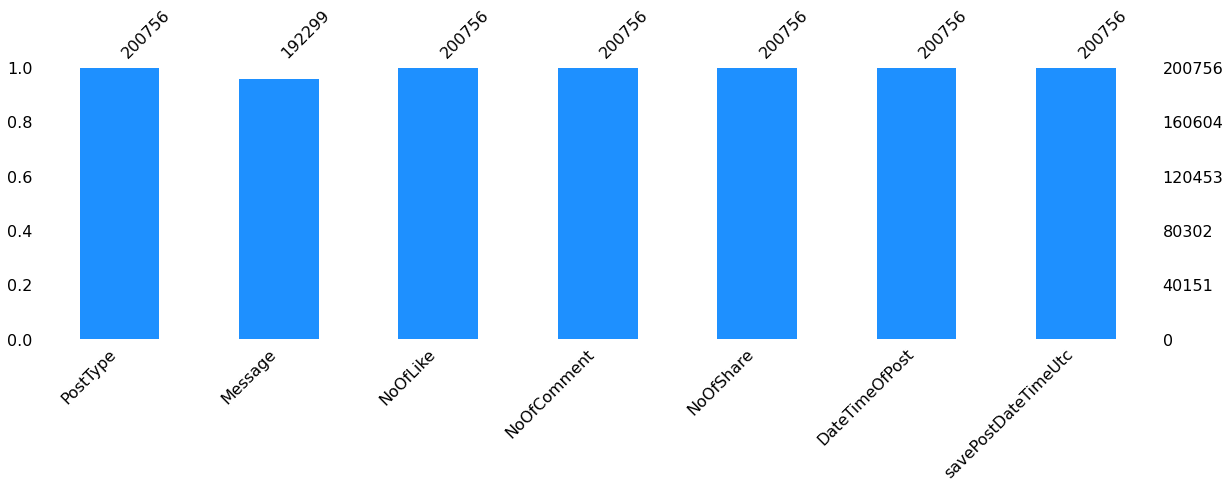

In [18]:
import missingno
missingno.bar(df, figsize = (20,5), color="dodgerblue")

#### Observations:- 
   - Message contains missing values.

#### Dropping Null Values

In [19]:
df.dropna(inplace = True)

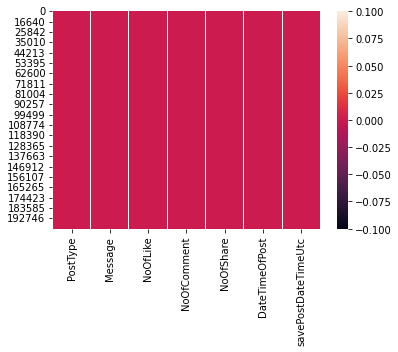

In [20]:
sns.heatmap(df.isnull())

#### Observations:- 
   - No missing values present in the dataset

### 2. Data Preprocessing

#### Extracting Date and Time details

In [21]:
df['DateTimeOfPost'] = [datetime.fromtimestamp(i).strftime('%d-%m-%y, %H:%M:%S') for i in df['DateTimeOfPost']]
df['savePostDateTimeUtc'] = [datetime.fromtimestamp(i).strftime('%d-%m-%y, %H:%M:%S') for i in df['savePostDateTimeUtc']]

In [22]:
df.sample(5)

,PostType,Message,NoOfLike,NoOfComment,NoOfShare,DateTimeOfPost,savePostDateTimeUtc
134253,IMAGE,"An #IEO Preparation Mock Test Video, especial...",0,0,0,"09-11-18, 06:43:25","12-11-18, 05:30:01"
189219,IMAGE,Genevieve GD Another Testimony of king humus ...,4,0,1,"03-08-17, 02:12:38","15-06-19, 14:28:48"
166568,TEXT,"Hi Frank Hatchett, i got the 4 days funnel af...",1,4,0,"22-02-19, 21:47:03","01-03-19, 01:51:23"
43115,TEXT,Anyone here who can ship electronics and phon...,1,1,0,"19-07-18, 02:25:11","19-07-18, 05:46:05"
147166,TEXT,Anyone know of UPS chargeable weight bracket...,0,19,0,"05-12-18, 09:01:40","05-12-18, 10:14:33"


In [23]:
df['DateTimeOfPost'] = df['DateTimeOfPost'].apply(lambda x: pd.Timestamp(x))
df['savePostDateTimeUtc'] = df['savePostDateTimeUtc'].apply(lambda x: pd.Timestamp(x))

In [24]:
df['Postyear'],df['Postmonth'],df['Postday'],df['Posttime'] = df['DateTimeOfPost'].dt.year,df['DateTimeOfPost'].dt.month,\
                                                               df['DateTimeOfPost'].dt.day, df['DateTimeOfPost'].dt.hour

df['savePostyear'],df['savePostmonth'],df['savePostday'],df['savePosttime'] = df['savePostDateTimeUtc'].dt.year,\
                                                                              df['savePostDateTimeUtc'].dt.month,\
                                                                              df['savePostDateTimeUtc'].dt.day,\
                                                                              df['savePostDateTimeUtc'].dt.hour

In [25]:
df = df.loc[:, ~df.columns.isin(['savePostDateTimeUtc','DateTimeOfPost'])]
df.sample(2)

,PostType,Message,NoOfLike,NoOfComment,NoOfShare,Postyear,Postmonth,Postday,Posttime,savePostyear,savePostmonth,savePostday,savePosttime
173296,IMAGE,"#माँ 😓😓 वो आँचल ज़र ज़र हो गया मेरा,जिस आँचल मे...",791,50,0,2019,5,24,20,2019,8,6,4
58943,IMAGE,Six barriers to becoming a digital business Bu...,0,0,0,2018,4,8,23,2018,5,8,0


#### Checking Unique Values

In [26]:
for i in df.columns:
    print(i, "column having ", df[i].nunique(), "unique values", "\n") 

PostType column having  3 unique values 

Message column having  167310 unique values 

NoOfLike column having  1227 unique values 

NoOfComment column having  333 unique values 

NoOfShare column having  176 unique values 

Postyear column having  9 unique values 

Postmonth column having  12 unique values 

Postday column having  31 unique values 

Posttime column having  24 unique values 

savePostyear column having  2 unique values 

savePostmonth column having  12 unique values 

savePostday column having  27 unique values 

savePosttime column having  24 unique values 



### 3. Dataset Labelling

In [27]:
df['Label'] = "Neutral"  #making a neutral label dataset

In [28]:
#replacing neutral label dataset with buyer and seller which contain buy and sell string in the dataset as per task

for i in df[df.Message.str.contains(pat = str('buy'), case = False) &\
            df.Message.str.contains(pat = str('sell'), case = False)].index:
    df['Label'][i] = df['Label'][i].replace("Neutral","Buyer & Seller")  

    
#replacing neutral label dataset with only buyer which contain buy string in the dataset as per task

for i in df[df.Message.str.contains(pat = str('buy'), case = False)].index:
    df['Label'][i] = df['Label'][i].replace("Neutral","Buyer")

#replacing neutral label dataset with only seller which contain sell string in the dataset as per task

for i in df[df.Message.str.contains(pat = str('sell'), case = False)].index:
    df['Label'][i] = df['Label'][i].replace("Neutral","Seller")


    

### 3.1 Checking Labels

#### Checking for Seller

In [38]:
def search():
    get = input("Enter type of customer:-")
    return df[df.Message.str.contains(pat = str(get), case = False)].index
search()

Enter type of customer:-sell


Int64Index([   112,    115,    120,    699,    998,   1024,   1026,   1162,
              1272,   1295,
            ...
            201576, 201586, 201588, 201596, 201634, 201640, 201659, 201717,
            201742, 201882],
           dtype='int64', length=5779)

In [39]:
df['Message'][201586]  #seller

' For those of you who sell HOME SECURITY... 1. If you have a promotion for a free installation but a customer has already purchased new security cameras, would ADT, Brinks, Xfinity, or whoever you’re with install those security cameras for an extra charge? 2. Can a customer purchase any security camera set from Amazon, Frys, or Best Buy and it still be compatible with an ADT, Brinks, Xfinity, or (Insert Company Name Here)  security system? '

#### Checking for Buyer

In [40]:
def search():
    get = input("Enter type of customer:-")
    return df[df.Message.str.contains(pat = str(get), case = False)].index
search()

Enter type of customer:-buy


Int64Index([    13,    112,    617,    705,    731,    732,    754,   1295,
              1308,   1349,
            ...
            201559, 201563, 201564, 201566, 201585, 201586, 201587, 201593,
            201700, 201836],
           dtype='int64', length=5617)

In [41]:
df['Message'][617]  #buyer

'www.abetteru.revitau.com Make a decision to help yourself with no risk involved. One cup of our coffee once a day for 30 days can change things in a big way. 30 day money back guarantee. Try before you buy with a FREE 3 day sample pack. PM me your address and email.www.abetteru.revitau.com\r\n '

#### Checking for Buyer & Seller

In [42]:
df[df.Message.str.contains(pat = str('buy'), case = False) &\
            df.Message.str.contains(pat = str('sell'), case = False)].index

Int64Index([   112,   1295,   1567,   2497,   2498,   2620,   3173,   3259,
              3329,   4415,
            ...
            199042, 199043, 199063, 199142, 199348, 199801, 199830, 200150,
            200176, 201586],
           dtype='int64', length=965)

In [43]:
df['Message'][199043]  #buyer and seller

'  Free Hemp Distributorship.Free Affiliate website.Start selling CBD Productsinstantly....Buy from your own site.Just sign up.trimurl.co/Hemp  '

#### Observations:- 
   - Labels are correctly assigned.

In [44]:
df['Label'].value_counts()

Neutral           181868
Seller              4814
Buyer               4652
Buyer & Seller       965
Name: Label, dtype: int64

In [45]:
df['Label'].value_counts()/df.shape[0]*100 #percentage

Neutral           94.575635
Seller             2.503393
Buyer              2.419149
Buyer & Seller     0.501823
Name: Label, dtype: float64

Dataset is very biased as Neutral values are about 95 percent in the dataset, we need to manage it further.

In [46]:
df.sample(5)

,PostType,Message,NoOfLike,NoOfComment,NoOfShare,Postyear,Postmonth,Postday,Posttime,savePostyear,savePostmonth,savePostday,savePosttime,Label
104671,IMAGE,"04.10.2018 - Piccolo Pagamento di 15,58 € in ...",0,0,0,2018,12,10,21,2018,10,13,6,Neutral
92768,IMAGE,The Lewiss woodpecker (Melanerpes lewis).\r,0,0,0,2018,9,27,13,2018,9,27,13,Neutral
76466,IMAGE,Descarga gratuitamente este e-book y conoce e...,0,0,0,2018,8,22,22,2018,8,23,6,Neutral
174396,IMAGE,Hi friends,9,1,0,2018,6,26,7,2019,8,6,5,Neutral
63988,IMAGE,🚨2 Winner🚨 🎲5 Randoms 🎲 ...,0,2,0,2018,6,8,13,2018,7,8,19,Neutral


### 4. Feature Extraction

In [29]:
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

In [30]:
stop_words.extend(['i','re','u', 'http','www','r','com','a','o','u','z','n'])

#### Noise Removal

In [31]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"’", "'", phrase)
    phrase = re.sub(r"“", """, phrase)
    phrase = re.sub(r"“", """, phrase)
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    # remove html markup
    phrase=re.sub("(<.*?>)","",phrase)
    
    #remove non-ascii and digits
    phrase=re.sub("(\\W|\\d)"," ",phrase)
    
    #remove whitespace
    phrase=phrase.strip()
    
    return phrase

In [32]:
from tqdm import tqdm
preprocessed_message = []

#tqdm is for printing the status bar
for sentence in tqdm(df['Message'].values):
    sentence = decontracted(sentence)
    sentence = re.sub(r'^https?:\/\/.*[\r\n]*', '', sentence) # remove hyperlinks
    sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence) # removing special characters
    sentence = ''.join([i for i in sentence if not i.isdigit()]) # removing numbers
    sentence = ' '.join(e for e in sentence.split() if e not in stop_words) # removing stop words
    sentence = ' '.join(lemmatizer.lemmatize(e) for e in sentence.split()) # Lemmatization
    preprocessed_message.append(sentence.lower().strip())

100%|██████████| 192299/192299 [01:32<00:00, 2068.49it/s]


In [33]:
df['Cleaned_messages'] = preprocessed_message

In [34]:
df['Cleaned_messages'].sample(5)

39760     woovly bucket list discover connect accomplish...
59604     ganador nuevo mero bisel de dise reloj de oro ...
58042     welcome urban farming community low investment...
167626    has anyone ever shipped brazil most audience i...
177594                         i love automation like butta
Name: Cleaned_messages, dtype: object

As per dataset there are some unnecessary words are removed and blank spaces created hence we need to check for blank spaces again.

#### Checking blank spaces again

In [35]:
for i in df.columns:
    df[i][df[i].apply(lambda i: True if re.search('^\s*$', str(i)) else False)]=None

In [36]:
df.isnull().sum()/len(df)*100 #checking null values percentage again

PostType            0.000000
Message             0.000000
NoOfLike            0.000000
NoOfComment         0.000000
NoOfShare           0.000000
Postyear            0.000000
Postmonth           0.000000
Postday             0.000000
Posttime            0.000000
savePostyear        0.000000
savePostmonth       0.000000
savePostday         0.000000
savePosttime        0.000000
Label               0.000000
Cleaned_messages    2.012491
dtype: float64

In [37]:
df.dropna(inplace = True) #dropping null values

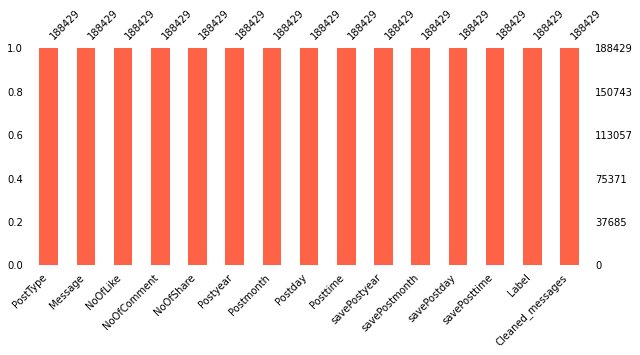

In [38]:
import missingno
missingno.bar(df, figsize = (10,4), color="tomato", fontsize=10)

### 5. Exploratory Data Analysis

In [ ]:
df.keys()

Index(['PostType', 'Message', 'NoOfLike', 'NoOfComment', 'NoOfShare',
       'Postyear', 'Postmonth', 'Postday', 'Posttime', 'savePostyear',
       'savePostmonth', 'savePostday', 'savePosttime', 'Label',
       'Cleaned_messages'],
      dtype='object')

#### PostType

    Year  PostType
0  IMAGE    127475
1   TEXT     52641
2  VIDEO      8313


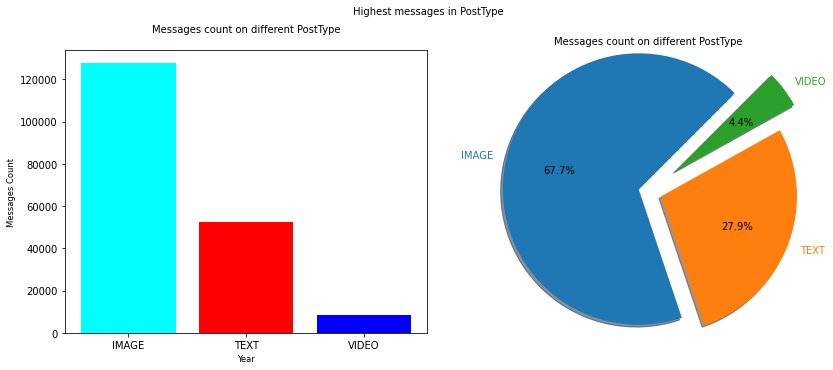

In [ ]:
PostType = df['PostType'].value_counts()
PostTypelabels = df['PostType'].unique()

print(df['PostType'].value_counts().reset_index().rename(columns={'index': 'Year', 'Postyear': 'Message count'}))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (12,5))

plot0 =   axs[0].bar(x = PostTypelabels
                     , height = PostType,color=['cyan','red', 'blue'] )
title0 =  axs[0].set_title('Messages count on different PostType\n', fontsize = 'medium')
xlabel0 = axs[0].set_xlabel('Year', fontsize = 'small')
ylabel0 = axs[0].set_ylabel('Messages Count', fontsize = 'small')

explode = (0.09, 0.12, 0.3)
title1 = axs[1].set_title('Messages count on different PostType', fontsize = 'medium')
patches, texts, plot1 = axs[1].pie(x = PostType, labels = PostTypelabels,
    autopct='%1.1f%%', shadow=True, explode=explode, startangle=45
    , radius=1.2)


cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45, 0.85, len(PostType))))

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())

plt.tight_layout()
text = fig.text(0.5, 1.02, 'Highest messages in PostType', ha='center', va='top', transform=fig.transFigure)

Observations:- IMAGE content messages are more in compare to TEXT and VIDEO as per above graph.

#### Post No of Likes

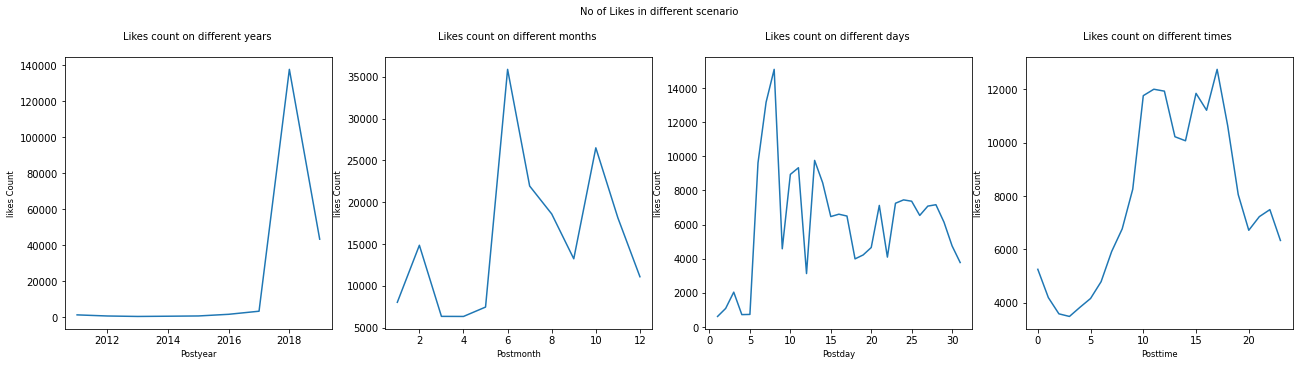

In [ ]:
like1 = pd.DataFrame(df.groupby(['Postyear']).count()['NoOfLike'].reset_index())
like2 = pd.DataFrame(df.groupby(['Postmonth']).count()['NoOfLike'].reset_index())
like3 = pd.DataFrame(df.groupby(['Postday']).count()['NoOfLike'].reset_index())
like4 = pd.DataFrame(df.groupby(['Posttime']).count()['NoOfLike'].reset_index())

fig, axs = plt.subplots(nrows=1, ncols=4, figsize= (22,5))

plot0 =   axs[0].plot(like1['Postyear'], like1['NoOfLike'])
title0 =  axs[0].set_title('Likes count on different years \n', fontsize = 'medium')
xlabel0 = axs[0].set_xlabel('Postyear', fontsize = 'small')
ylabel0 = axs[0].set_ylabel('likes Count', fontsize = 'small')

plot1 =   axs[1].plot(like2['Postmonth'], like2['NoOfLike'])
title1 =  axs[1].set_title('Likes count on different months \n', fontsize = 'medium')
xlabel1 = axs[1].set_xlabel('Postmonth', fontsize = 'small')
ylabel1 = axs[1].set_ylabel('likes Count', fontsize = 'small')



plot2 =   axs[2].plot(like3['Postday'], like3['NoOfLike'])
title2 =  axs[2].set_title('Likes count on different days \n', fontsize = 'medium')
xlabel2 = axs[2].set_xlabel('Postday', fontsize = 'small')
ylabel2 = axs[2].set_ylabel('likes Count', fontsize = 'small')


plot3 =   axs[3].plot(like4['Posttime'], like4['NoOfLike'])
title3 =  axs[3].set_title('Likes count on different times \n', fontsize = 'medium')
xlabel3 = axs[3].set_xlabel('Posttime', fontsize = 'small')
ylabel3 = axs[3].set_ylabel('likes Count', fontsize = 'small')


text = fig.text(0.5, 1.02, 'No of Likes in different scenario', ha='center', va='top', transform=fig.transFigure)

#### Post No of Comments

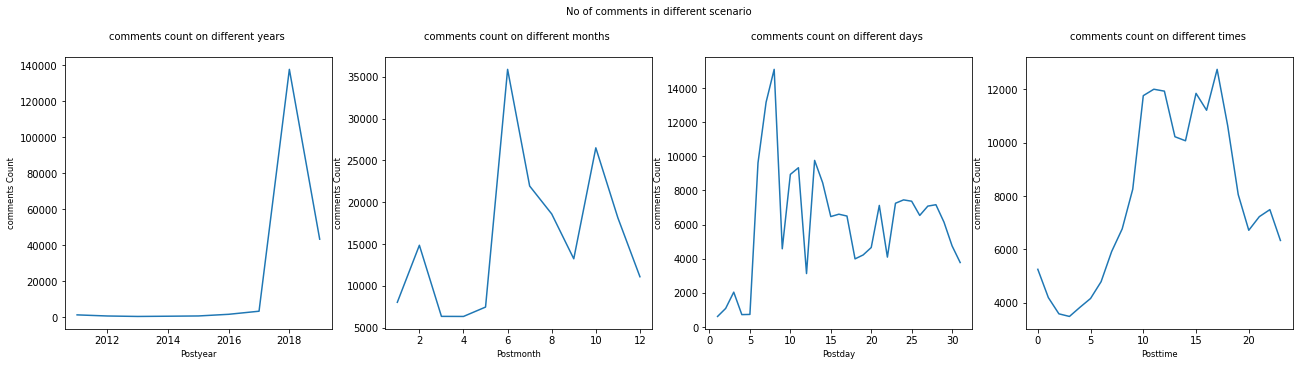

In [ ]:
df1 = pd.DataFrame(df.groupby(['Postyear']).count()['NoOfComment'].reset_index())
df2 = pd.DataFrame(df.groupby(['Postmonth']).count()['NoOfComment'].reset_index())
df3 = pd.DataFrame(df.groupby(['Postday']).count()['NoOfComment'].reset_index())
df4 = pd.DataFrame(df.groupby(['Posttime']).count()['NoOfComment'].reset_index())

fig, axs = plt.subplots(nrows=1, ncols=4, figsize= (22,5))

plot0 =   axs[0].plot(df1['Postyear'], df1['NoOfComment'])
title0 =  axs[0].set_title('comments count on different years \n', fontsize = 'medium')
xlabel0 = axs[0].set_xlabel('Postyear', fontsize = 'small')
ylabel0 = axs[0].set_ylabel('comments Count', fontsize = 'small')

plot1 =   axs[1].plot(df2['Postmonth'], df2['NoOfComment'])
title1 =  axs[1].set_title('comments count on different months \n', fontsize = 'medium')
xlabel1 = axs[1].set_xlabel('Postmonth', fontsize = 'small')
ylabel1 = axs[1].set_ylabel('comments Count', fontsize = 'small')



plot2 =   axs[2].plot(df3['Postday'], df3['NoOfComment'])
title2 =  axs[2].set_title('comments count on different days \n', fontsize = 'medium')
xlabel2 = axs[2].set_xlabel('Postday', fontsize = 'small')
ylabel2 = axs[2].set_ylabel('comments Count', fontsize = 'small')


plot3 =   axs[3].plot(df4['Posttime'], df4['NoOfComment'])
title3 =  axs[3].set_title('comments count on different times \n', fontsize = 'medium')
xlabel3 = axs[3].set_xlabel('Posttime', fontsize = 'small')
ylabel3 = axs[3].set_ylabel('comments Count', fontsize = 'small')


text = fig.text(0.5, 1.02, 'No of comments in different scenario', ha='center', va='top', transform=fig.transFigure)

#### Post No of Shares

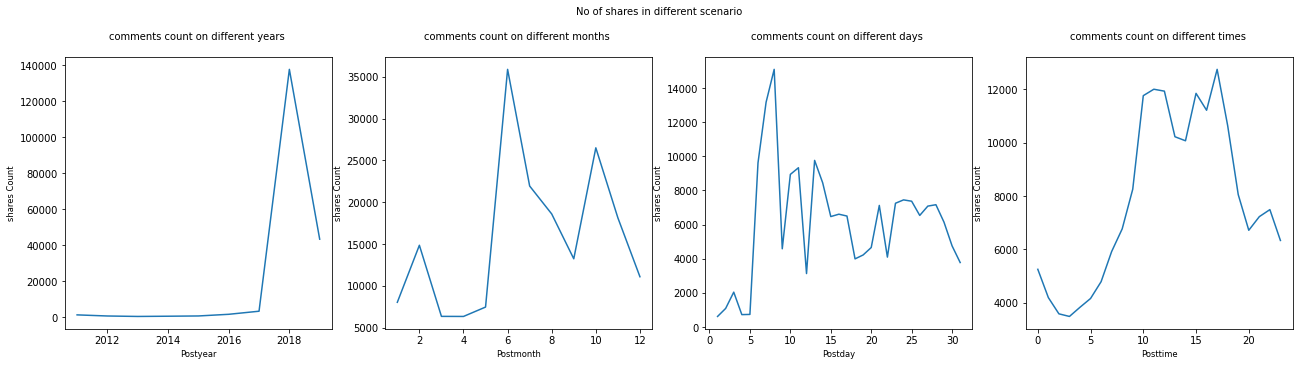

In [ ]:
df1 = pd.DataFrame(df.groupby(['Postyear']).count()['NoOfShare'].reset_index())
df2 = pd.DataFrame(df.groupby(['Postmonth']).count()['NoOfShare'].reset_index())
df3 = pd.DataFrame(df.groupby(['Postday']).count()['NoOfShare'].reset_index())
df4 = pd.DataFrame(df.groupby(['Posttime']).count()['NoOfShare'].reset_index())

fig, axs = plt.subplots(nrows=1, ncols=4, figsize= (22,5))

plot0 =   axs[0].plot(df1['Postyear'], df1['NoOfShare'])
title0 =  axs[0].set_title('comments count on different years \n', fontsize = 'medium')
xlabel0 = axs[0].set_xlabel('Postyear', fontsize = 'small')
ylabel0 = axs[0].set_ylabel('shares Count', fontsize = 'small')

plot1 =   axs[1].plot(df2['Postmonth'], df2['NoOfShare'])
title1 =  axs[1].set_title('comments count on different months \n', fontsize = 'medium')
xlabel1 = axs[1].set_xlabel('Postmonth', fontsize = 'small')
ylabel1 = axs[1].set_ylabel('shares Count', fontsize = 'small')



plot2 =   axs[2].plot(df3['Postday'], df3['NoOfShare'])
title2 =  axs[2].set_title('comments count on different days \n', fontsize = 'medium')
xlabel2 = axs[2].set_xlabel('Postday', fontsize = 'small')
ylabel2 = axs[2].set_ylabel('shares Count', fontsize = 'small')


plot3 =   axs[3].plot(df4['Posttime'], df4['NoOfShare'])
title3 =  axs[3].set_title('comments count on different times \n', fontsize = 'medium')
xlabel3 = axs[3].set_xlabel('Posttime', fontsize = 'small')
ylabel3 = axs[3].set_ylabel('shares Count', fontsize = 'small')


text = fig.text(0.5, 1.02, 'No of shares in different scenario', ha='center', va='top', transform=fig.transFigure)

#### Save Post Likes

In [ ]:
df.keys()

Index(['PostType', 'Message', 'NoOfLike', 'NoOfComment', 'NoOfShare',
       'Postyear', 'Postmonth', 'Postday', 'Posttime', 'savePostyear',
       'savePostmonth', 'savePostday', 'savePosttime', 'Label',
       'Cleaned_messages'],
      dtype='object')

#### Save No of Likes

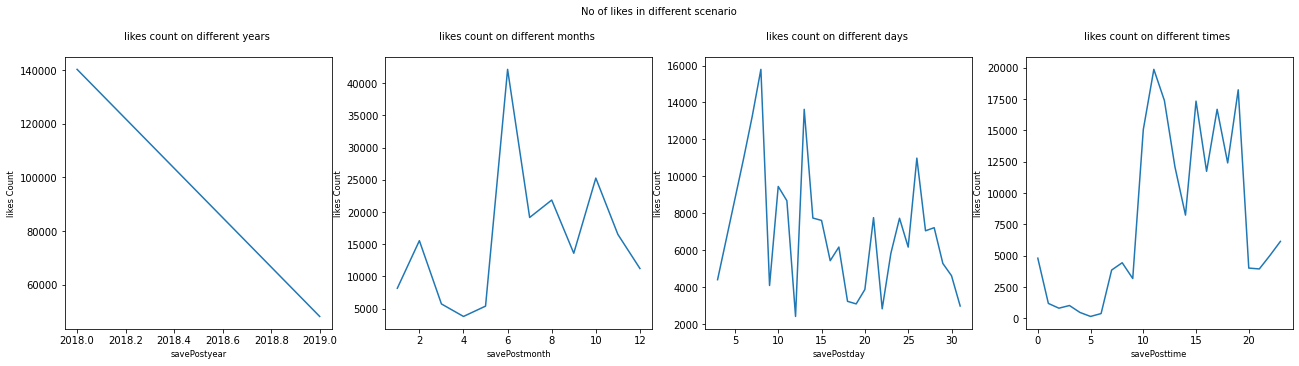

In [ ]:
df1 = pd.DataFrame(df.groupby(['savePostyear']).count()['NoOfLike'].reset_index())
df2 = pd.DataFrame(df.groupby(['savePostmonth']).count()['NoOfLike'].reset_index())
df3 = pd.DataFrame(df.groupby(['savePostday']).count()['NoOfLike'].reset_index())
df4 = pd.DataFrame(df.groupby(['savePosttime']).count()['NoOfLike'].reset_index())

fig, axs = plt.subplots(nrows=1, ncols=4, figsize= (22,5))

plot0 =   axs[0].plot(df1['savePostyear'], df1['NoOfLike'])
title0 =  axs[0].set_title('likes count on different years \n', fontsize = 'medium')
xlabel0 = axs[0].set_xlabel('savePostyear', fontsize = 'small')
ylabel0 = axs[0].set_ylabel('likes Count', fontsize = 'small')

plot1 =   axs[1].plot(df2['savePostmonth'], df2['NoOfLike'])
title1 =  axs[1].set_title('likes count on different months \n', fontsize = 'medium')
xlabel1 = axs[1].set_xlabel('savePostmonth', fontsize = 'small')
ylabel1 = axs[1].set_ylabel('likes Count', fontsize = 'small')



plot2 =   axs[2].plot(df3['savePostday'], df3['NoOfLike'])
title2 =  axs[2].set_title('likes count on different days \n', fontsize = 'medium')
xlabel2 = axs[2].set_xlabel('savePostday', fontsize = 'small')
ylabel2 = axs[2].set_ylabel('likes Count', fontsize = 'small')


plot3 =   axs[3].plot(df4['savePosttime'], df4['NoOfLike'])
title3 =  axs[3].set_title('likes count on different times \n', fontsize = 'medium')
xlabel3 = axs[3].set_xlabel('savePosttime', fontsize = 'small')
ylabel3 = axs[3].set_ylabel('likes Count', fontsize = 'small')


text = fig.text(0.5, 1.02, 'No of likes in different scenario', ha='center', va='top', transform=fig.transFigure)

#### Save No of Comments

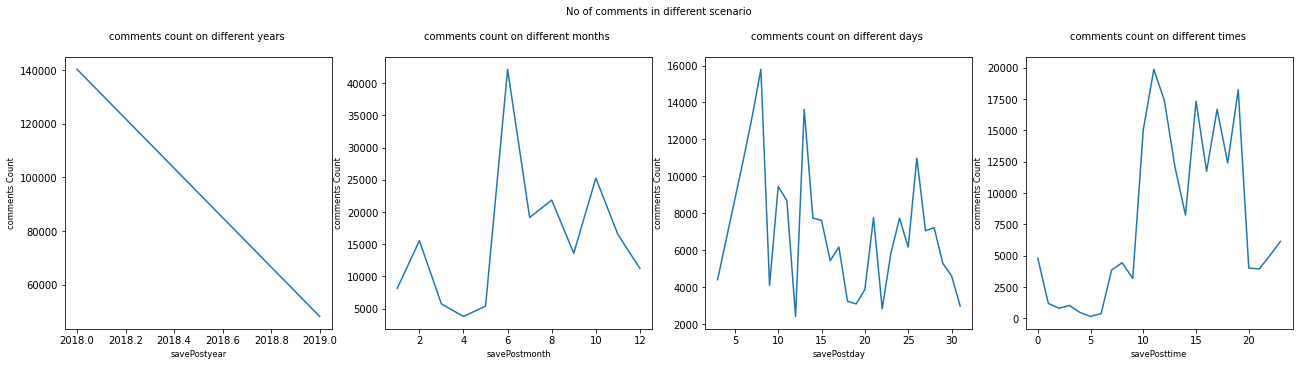

In [ ]:
df1 = pd.DataFrame(df.groupby(['savePostyear']).count()['NoOfComment'].reset_index())
df2 = pd.DataFrame(df.groupby(['savePostmonth']).count()['NoOfComment'].reset_index())
df3 = pd.DataFrame(df.groupby(['savePostday']).count()['NoOfComment'].reset_index())
df4 = pd.DataFrame(df.groupby(['savePosttime']).count()['NoOfComment'].reset_index())

fig, axs = plt.subplots(nrows=1, ncols=4, figsize= (22,5))

plot0 =   axs[0].plot(df1['savePostyear'], df1['NoOfComment'])
title0 =  axs[0].set_title('comments count on different years \n', fontsize = 'medium')
xlabel0 = axs[0].set_xlabel('savePostyear', fontsize = 'small')
ylabel0 = axs[0].set_ylabel('comments Count', fontsize = 'small')

plot1 =   axs[1].plot(df2['savePostmonth'], df2['NoOfComment'])
title1 =  axs[1].set_title('comments count on different months \n', fontsize = 'medium')
xlabel1 = axs[1].set_xlabel('savePostmonth', fontsize = 'small')
ylabel1 = axs[1].set_ylabel('comments Count', fontsize = 'small')



plot2 =   axs[2].plot(df3['savePostday'], df3['NoOfComment'])
title2 =  axs[2].set_title('comments count on different days \n', fontsize = 'medium')
xlabel2 = axs[2].set_xlabel('savePostday', fontsize = 'small')
ylabel2 = axs[2].set_ylabel('comments Count', fontsize = 'small')


plot3 =   axs[3].plot(df4['savePosttime'], df4['NoOfComment'])
title3 =  axs[3].set_title('comments count on different times \n', fontsize = 'medium')
xlabel3 = axs[3].set_xlabel('savePosttime', fontsize = 'small')
ylabel3 = axs[3].set_ylabel('comments Count', fontsize = 'small')


text = fig.text(0.5, 1.02, 'No of comments in different scenario', ha='center', va='top', transform=fig.transFigure)

#### Save No of Shares

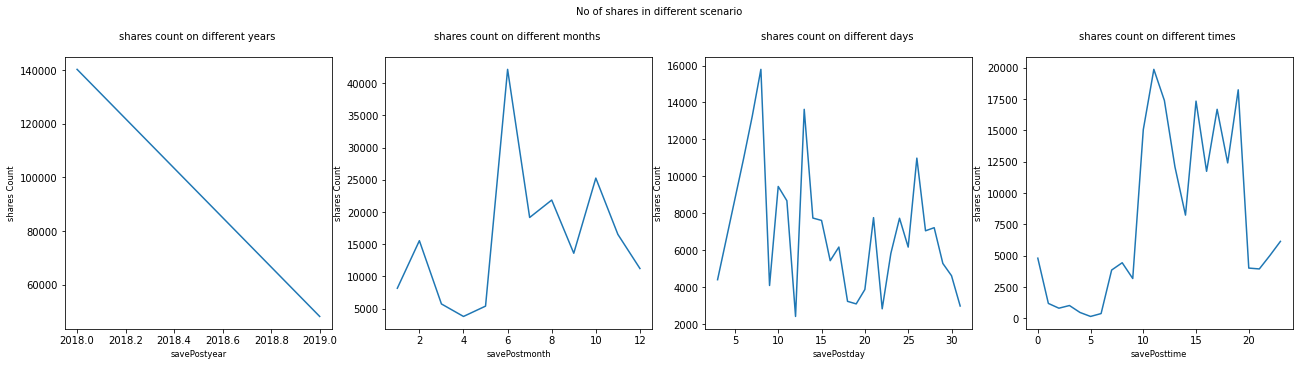

In [ ]:
df1 = pd.DataFrame(df.groupby(['savePostyear']).count()['NoOfShare'].reset_index())
df2 = pd.DataFrame(df.groupby(['savePostmonth']).count()['NoOfShare'].reset_index())
df3 = pd.DataFrame(df.groupby(['savePostday']).count()['NoOfShare'].reset_index())
df4 = pd.DataFrame(df.groupby(['savePosttime']).count()['NoOfShare'].reset_index())

fig, axs = plt.subplots(nrows=1, ncols=4, figsize= (22,5))

plot0 =   axs[0].plot(df1['savePostyear'], df1['NoOfShare'])
title0 =  axs[0].set_title('shares count on different years \n', fontsize = 'medium')
xlabel0 = axs[0].set_xlabel('savePostyear', fontsize = 'small')
ylabel0 = axs[0].set_ylabel('shares Count', fontsize = 'small')

plot1 =   axs[1].plot(df2['savePostmonth'], df2['NoOfShare'])
title1 =  axs[1].set_title('shares count on different months \n', fontsize = 'medium')
xlabel1 = axs[1].set_xlabel('savePostmonth', fontsize = 'small')
ylabel1 = axs[1].set_ylabel('shares Count', fontsize = 'small')



plot2 =   axs[2].plot(df3['savePostday'], df3['NoOfShare'])
title2 =  axs[2].set_title('shares count on different days \n', fontsize = 'medium')
xlabel2 = axs[2].set_xlabel('savePostday', fontsize = 'small')
ylabel2 = axs[2].set_ylabel('shares Count', fontsize = 'small')


plot3 =   axs[3].plot(df4['savePosttime'], df4['NoOfShare'])
title3 =  axs[3].set_title('shares count on different times \n', fontsize = 'medium')
xlabel3 = axs[3].set_xlabel('savePosttime', fontsize = 'small')
ylabel3 = axs[3].set_ylabel('shares Count', fontsize = 'small')


text = fig.text(0.5, 1.02, 'No of shares in different scenario', ha='center', va='top', transform=fig.transFigure)

#### Postyear

   Year  Message count
0  2018         137534
1  2019          43210
2  2017           3200
3  2016           1488
4  2011           1168
5  2015            564
6  2012            547
7  2014            422
8  2013            296


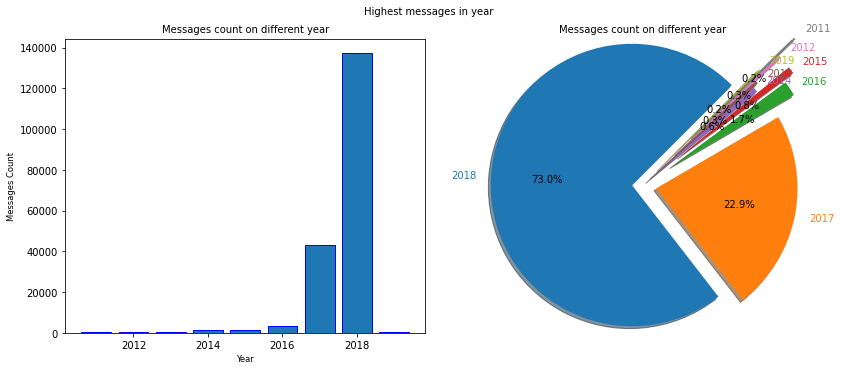

In [ ]:
postyear = df['Postyear'].value_counts()
postyearlabels = df['Postyear'].unique()

print(df['Postyear'].value_counts().reset_index().rename(columns={'index': 'Year', 'Postyear': 'Message count'}))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (12,5))

plot0 =   axs[0].bar(x = postyearlabels
                     , height = postyear, edgecolor='blue' )
title0 =  axs[0].set_title('Messages count on different year', fontsize = 'medium')
xlabel0 = axs[0].set_xlabel('Year', fontsize = 'small')
ylabel0 = axs[0].set_ylabel('Messages Count', fontsize = 'small')

explode = (0.09, 0.12, 0.3, 0.4, 0.06, 0.11,0.4,0.6,0.2)
title1 = axs[1].set_title('Messages count on different year', fontsize = 'medium')
patches, texts, plot1 = axs[1].pie(x = postyear, labels = postyearlabels,
    autopct='%1.1f%%', shadow=True, explode=explode, startangle=45
    , radius=1.2)


cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45, 0.85, len(postyear))))

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())

plt.tight_layout()
text = fig.text(0.5, 1.02, 'Highest messages in year', ha='center', va='top', transform=fig.transFigure)

Observations:- Most of the post are in the year 2018 while rest years are very low in numbers.

#### PostMonth

    Month  Message count
0       6          35896
1      10          26509
2       7          21940
3       8          18598
4      11          18135
5       2          14853
6       9          13235
7      12          11088
8       1           8030
9       5           7460
10      3           6347
11      4           6338


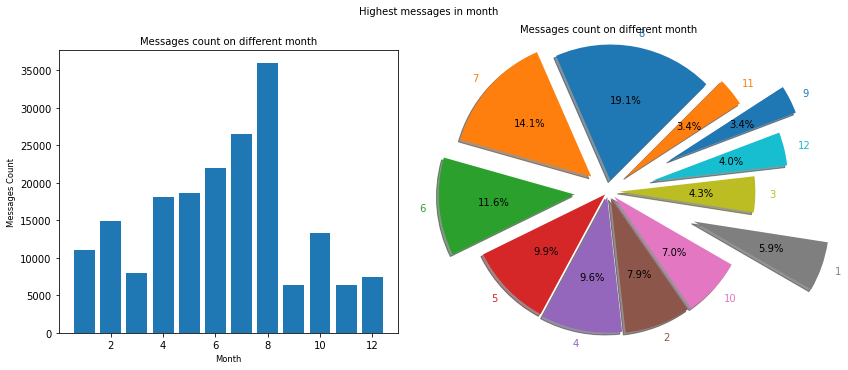

In [ ]:
postmonth = df['Postmonth'].value_counts()
postmonthlabels = df['Postmonth'].unique()

print(df['Postmonth'].value_counts().reset_index().rename(columns={'index': 'Month', 'Postmonth': 'Message count'}))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (12,5))

plot0 =   axs[0].bar(x = postmonthlabels
                     , height = postmonth, )
title0 =  axs[0].set_title('Messages count on different month', fontsize = 'medium')
xlabel0 = axs[0].set_xlabel('Month', fontsize = 'small')
ylabel0 = axs[0].set_ylabel('Messages Count', fontsize = 'small')

explode = (0.1, 0.2, 0.3, 0.04, 0.05, 0.06,0.07, 0.8, 0.1,0.4,0.6,0.2)
title1 = axs[1].set_title('Messages count on different month\n', fontsize = 'medium')
patches, texts, plot1 = axs[1].pie(x = postmonth, labels = postmonthlabels,
    autopct='%1.1f%%', shadow=True, explode=explode, startangle=45
    , radius=1.2)


cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45, 0.85, len(postmonth))))

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())

plt.tight_layout()
text = fig.text(0.5, 1.02, 'Highest messages in month', ha='center', va='top', transform=fig.transFigure)

#### PostDay

    Day  Message count
0     8          15099
1     7          13171
2    13           9762
3     6           9619
4    11           9331
5    10           8941
6    14           8445
7    24           7447
8    25           7369
9    23           7250
10   28           7164
11   21           7122
12   27           7082
13   16           6608
14   26           6536
15   17           6500
16   15           6469
17   29           6139
18   30           4750
19   20           4654
20    9           4580
21   19           4218
22   22           4092
23   18           3989
24   31           3774
25   12           3128
26    3           2038
27    2           1084
28    5            733
29    4            721
30    1            614


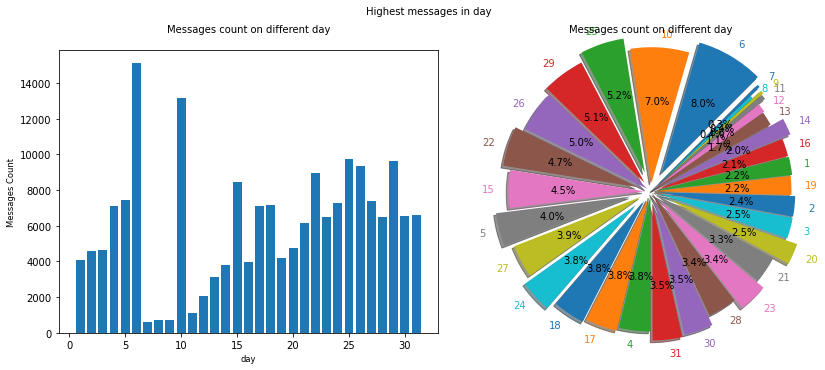

In [ ]:
Postday = df['Postday'].value_counts()
Postdaylabels = df['Postday'].unique()

print(df['Postday'].value_counts().reset_index().rename(columns={'index': 'Day', 'Postday': 'Message count'}))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (12,5))

plot0 =   axs[0].bar(x = Postdaylabels
                     , height = Postday, )
title0 =  axs[0].set_title('Messages count on different day\n', fontsize = 'medium')
xlabel0 = axs[0].set_xlabel('day', fontsize = 'small')
ylabel0 = axs[0].set_ylabel('Messages Count', fontsize = 'small')

explode = np.random.uniform(0.01, 0.2, size=(31))
title1 = axs[1].set_title('Messages count on different day\n', fontsize = 'medium')
patches, texts, plot1 = axs[1].pie(x = Postday, labels = Postdaylabels,
    autopct='%1.1f%%', shadow=True, explode=explode, startangle=45
    , radius=1.2)


cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45, 0.85, len(Postday))))

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())

plt.tight_layout()
text = fig.text(0.5, 1.02, 'Highest messages in day', ha='center', va='top', transform=fig.transFigure)

Observations:- 8th day messages are more in compare to other days as per above graph.

#### Posttime

    time  Message count
0     17          12752
1     11          12006
2     12          11934
3     15          11851
4     10          11765
5     16          11217
6     18          10639
7     13          10223
8     14          10071
9      9           8253
10    19           8052
11    22           7487
12    21           7223
13     8           6764
14    20           6712
15    23           6329
16     7           5914
17     0           5246
18     6           4782
19     1           4184
20     5           4151
21     4           3822
22     2           3575
23     3           3477


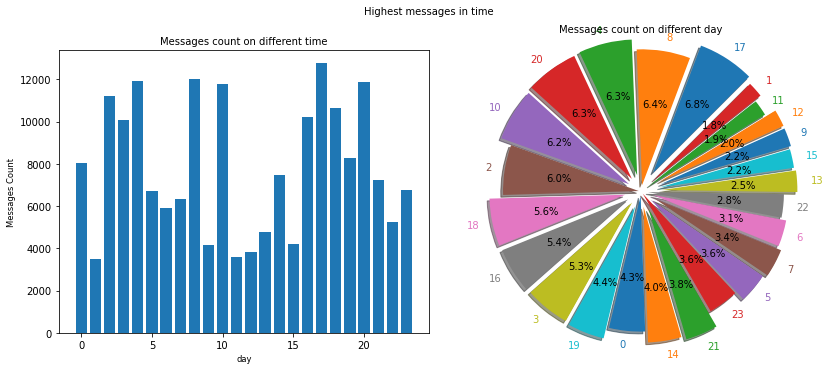

In [ ]:
Posttime = df['Posttime'].value_counts()
Posttimelabels = df['Posttime'].unique()

print(df['Posttime'].value_counts().reset_index().rename(columns={'index': 'time', 'Posttime': 'Message count'}))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (12,5))

plot0 =   axs[0].bar(x = Posttimelabels
                     , height = Posttime, )
title0 =  axs[0].set_title('Messages count on different time', fontsize = 'medium')
xlabel0 = axs[0].set_xlabel('day', fontsize = 'small')
ylabel0 = axs[0].set_ylabel('Messages Count', fontsize = 'small')

explode = np.random.uniform(0.02, 0.2, size=(24))
title1 = axs[1].set_title('Messages count on different day\n', fontsize = 'medium')
patches, texts, plot1 = axs[1].pie(x = Posttime, labels = Posttimelabels,
    autopct='%1.1f%%', shadow=True, explode=explode, startangle=45
    , radius=1.2)


cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45, 0.85, len(Posttime))))

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())

plt.tight_layout()
text = fig.text(0.5, 1.02, 'Highest messages in time', ha='center', va='top', transform=fig.transFigure)

Observations:- 17th hours messages are more in compare to other hours as per above graph.

#### savePostyear

   Year  savePostyear
0  2018        140292
1  2019         48137


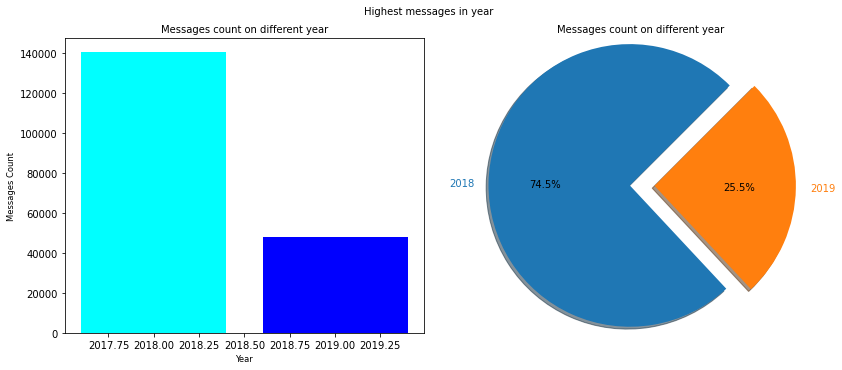

In [ ]:
savePostyear = df['savePostyear'].value_counts()
savePostyearlabels = df['savePostyear'].unique()

print(df['savePostyear'].value_counts().reset_index().rename(columns={'index': 'Year', 'Postyear': 'Message count'}))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (12,5))

plot0 =   axs[0].bar(x = savePostyearlabels, height = savePostyear, color=['cyan', 'blue'] )
title0 =  axs[0].set_title('Messages count on different year', fontsize = 'medium')
xlabel0 = axs[0].set_xlabel('Year', fontsize = 'small')
ylabel0 = axs[0].set_ylabel('Messages Count', fontsize = 'small')

explode = (0.09, 0.12,)
title1 = axs[1].set_title('Messages count on different year', fontsize = 'medium')
patches, texts, plot1 = axs[1].pie(x = savePostyear, labels = savePostyearlabels,
    autopct='%1.1f%%', shadow=True, explode=explode, startangle=45
    , radius=1.2)


cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45, 0.85, len(savePostyear))))

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())

plt.tight_layout()
text = fig.text(0.5, 1.02, 'Highest messages in year', ha='center', va='top', transform=fig.transFigure)

Observations:- 2018 year messages saved from post are more in compare to other year as per above graph.

#### savePostmonth

    Month  Message count
0       6          42136
1      10          25263
2       8          21857
3       7          19152
4      11          16529
5       2          15554
6       9          13602
7      12          11234
8       1           8171
9       3           5736
10      5           5398
11      4           3797


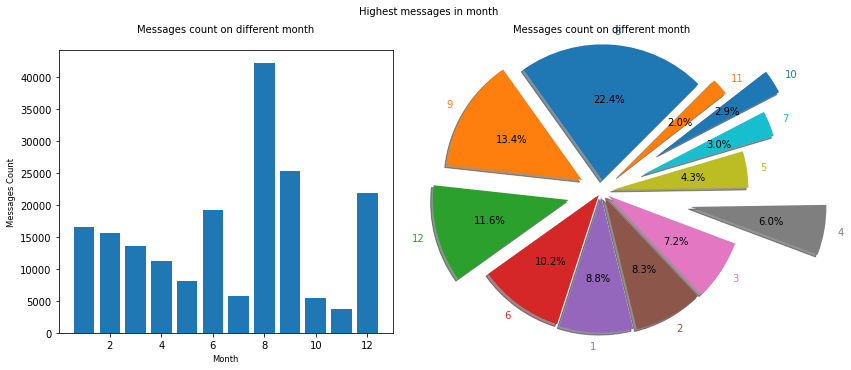

In [ ]:
savePostmonth = df['savePostmonth'].value_counts()
savePostmonthlabels = df['savePostmonth'].unique()

print(df['savePostmonth'].value_counts().reset_index().rename(columns={'index': 'Month', 'savePostmonth': 'Message count'}))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (12,5))

plot0 =   axs[0].bar(x = savePostmonthlabels
                     ,height = savePostmonth, )
title0 =  axs[0].set_title('Messages count on different month\n', fontsize = 'medium')
xlabel0 = axs[0].set_xlabel('Month', fontsize = 'small')
ylabel0 = axs[0].set_ylabel('Messages Count', fontsize = 'small')

explode = (0.1, 0.2, 0.3, 0.04, 0.05, 0.06,0.07, 0.8, 0.1,0.4,0.6,0.2)
title1 = axs[1].set_title('Messages count on different month\n', fontsize = 'medium')
patches, texts, plot1 = axs[1].pie(x = savePostmonth, labels = savePostmonthlabels,
    autopct='%1.1f%%', shadow=True, explode=explode, startangle=45
    , radius=1.2)


cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45, 0.85, len(savePostmonth))))

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())

plt.tight_layout()
text = fig.text(0.5, 1.02, 'Highest messages in month', ha='center', va='top', transform=fig.transFigure)

#### savePostday

    Day  Message count
0     8          15792
1    13          13629
2     7          13248
3    26          10989
4     6          10955
5    10           9456
6    11           8684
7    21           7769
8    14           7747
9    24           7736
10   15           7618
11   28           7225
12   27           7058
13   17           6178
14   25           6175
15   23           5834
16   16           5440
17   29           5290
18   30           4627
19    3           4411
20    9           4098
21   20           3881
22   18           3240
23   19           3102
24   31           2988
25   22           2836
26   12           2423


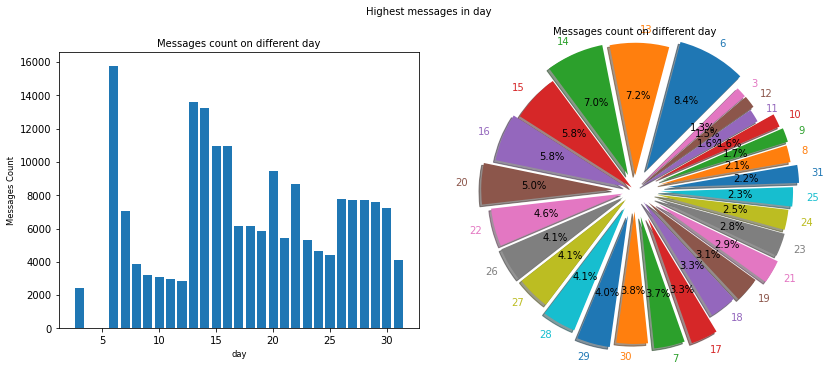

In [ ]:
savePostday = df['savePostday'].value_counts()
savePostdaylabels = df['savePostday'].unique()

print(df['savePostday'].value_counts().reset_index().rename(columns={'index': 'Day', 'savePostday': 'Message count'}))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (12,5))

plot0 =   axs[0].bar(x = savePostdaylabels
                     , height = savePostday, )
title0 =  axs[0].set_title('Messages count on different day', fontsize = 'medium')
xlabel0 = axs[0].set_xlabel('day', fontsize = 'small')
ylabel0 = axs[0].set_ylabel('Messages Count', fontsize = 'small')

explode = np.random.uniform(0.01, 0.3, size=(27))
title1 = axs[1].set_title('Messages count on different day\n', fontsize = 'medium')
patches, texts, plot1 = axs[1].pie(x = savePostday, labels = savePostdaylabels,
    autopct='%1.1f%%', shadow=True, explode=explode, startangle=45
    , radius=1.2)


cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45, 0.85, len(savePostday))))

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())

plt.tight_layout()
text = fig.text(0.5, 1.02, 'Highest messages in day', ha='center', va='top', transform=fig.transFigure)

#### savePosttime

    time  Message count
0     11          19862
1     19          18230
2     12          17378
3     15          17328
4     17          16676
5     10          15054
6     18          12400
7     13          12089
8     16          11730
9     14           8238
10    23           6143
11    22           5013
12     0           4803
13     8           4439
14    20           4013
15    21           3945
16     7           3857
17     9           3181
18     1           1194
19     3           1027
20     2            814
21     4            473
22     6            386
23     5            156


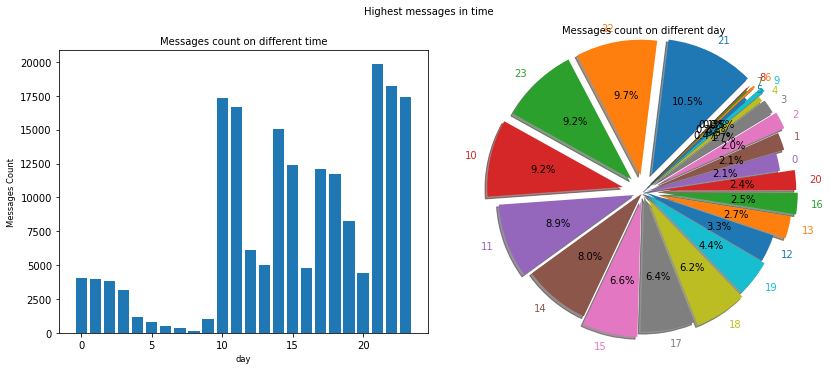

In [ ]:
savePosttime = df['savePosttime'].value_counts()
savePosttimelabels = df['savePosttime'].unique()

print(df['savePosttime'].value_counts().reset_index().rename(columns={'index': 'time', 'savePosttime': 'Message count'}))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (12,5))

plot0 =   axs[0].bar(x = savePosttimelabels
                     , height = savePosttime, )
title0 =  axs[0].set_title('Messages count on different time', fontsize = 'medium')
xlabel0 = axs[0].set_xlabel('day', fontsize = 'small')
ylabel0 = axs[0].set_ylabel('Messages Count', fontsize = 'small')

explode = np.random.uniform(0.01, 0.2, size=(24))
title1 = axs[1].set_title('Messages count on different day\n', fontsize = 'medium')
patches, texts, plot1 = axs[1].pie(x = savePosttime, labels = savePosttimelabels,
    autopct='%1.1f%%', shadow=True, explode=explode, startangle=45
    , radius=1.2)


cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45, 0.85, len(savePosttime))))

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())

plt.tight_layout()
text = fig.text(0.5, 1.02, 'Highest messages in time', ha='center', va='top', transform=fig.transFigure)

Observations:- 11th day messages are more saved from post in compare to other days as per above graph.

#### Labels

            Label  Message count
0         Neutral         177999
1          Seller           4813
2           Buyer           4652
3  Buyer & Seller            965


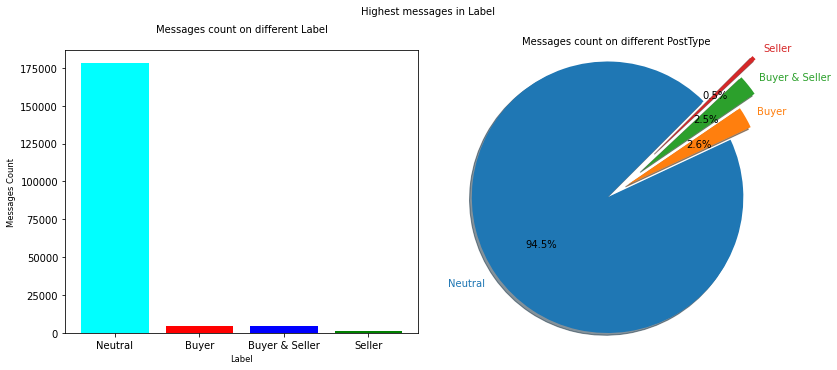

In [ ]:
Label = df['Label'].value_counts()
PostTypelabels = df['Label'].unique()

print(df['Label'].value_counts().reset_index().rename(columns={'index': 'Label', 'Label': 'Message count'}))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (12,5))

plot0 =   axs[0].bar(x = PostTypelabels
                     , height = Label,color=['cyan','red', 'blue', 'green'] )
title0 =  axs[0].set_title('Messages count on different Label\n', fontsize = 'medium')
xlabel0 = axs[0].set_xlabel('Label', fontsize = 'small')
ylabel0 = axs[0].set_ylabel('Messages Count', fontsize = 'small')

explode = (0.09, 0.12, 0.3,0.5)
title1 = axs[1].set_title('Messages count on different PostType', fontsize = 'medium')
patches, texts, plot1 = axs[1].pie(x = Label, labels = PostTypelabels,
    autopct='%1.1f%%', shadow=True, explode=explode, startangle=45
    , radius=1.2)


cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45, 0.85, len(Label))))

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())

plt.tight_layout()
text = fig.text(0.5, 1.02, 'Highest messages in Label', ha='center', va='top', transform=fig.transFigure)

Observations:- Neutral labels are more in compare to other labels as per above graph.

#### Message Character Length

<AxesSubplot:xlabel='Message', ylabel='Density'>

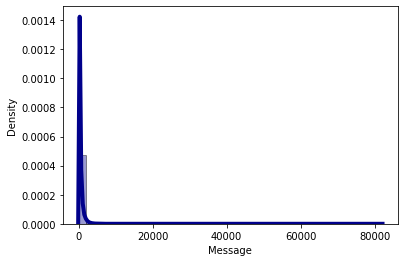

In [ ]:
#Density plot and histogram of all character count

sns.distplot(df.Message.str.len(), hist=True,kde=True,
              bins= 40,color='darkblue',
              hist_kws={'edgecolor':'black'},
              kde_kws={'linewidth':4})

Observations:- Messages character count are ranges in 0 to 80000 as per observed graph.

#### Clean Messages Character length

<AxesSubplot:xlabel='Cleaned_messages', ylabel='Density'>

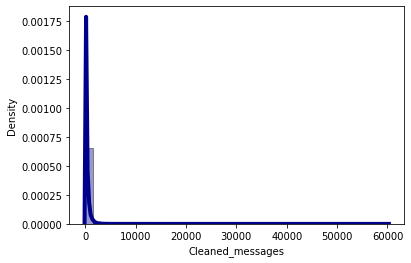

In [ ]:
#Density plot and histogram of all character count

sns.distplot(df.Cleaned_messages.str.len(), hist=True,kde=True,
              bins= 40,color='darkblue',
              hist_kws={'edgecolor':'black'},
              kde_kws={'linewidth':4})

Observations:- Clean messages character count are ranges in 0 to 60000 as per observed graph.

#### Average length of Message

<AxesSubplot:xlabel='Message', ylabel='Density'>

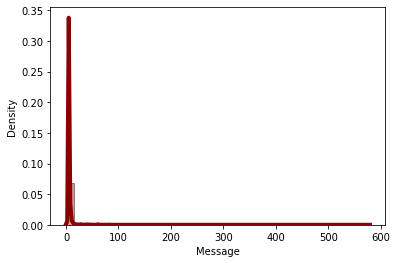

In [ ]:
def avg_word(sentence):
    words=sentence.split()
    if len(words) == 0:
        pass
    else:
        return(sum(len(word) for word in words)/len(words))
    
#Density plot and histogram of average word length
sns.distplot(df['Message'].apply(lambda x: avg_word(x)), 
             hist=True, kde=True,
              bins = 40 ,color='darkred',
              hist_kws={'edgecolor':'black'},
              kde_kws={'linewidth':4})

Observations:- Average messages character count are about ranges in 0 to 580 as per observed graph.

#### Average length of Clean Messages

<AxesSubplot:xlabel='Cleaned_messages', ylabel='Density'>

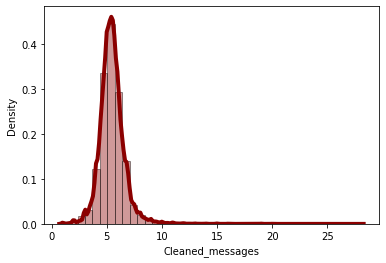

In [ ]:
def avg_word(sentence):
    words=sentence.split()
    if len(words) == 0:
        pass
    else:
        return(sum(len(word) for word in words)/len(words))
    
#Density plot and histogram of average word length
sns.distplot(df['Cleaned_messages'].apply(lambda x: avg_word(x)), 
             hist=True, kde=True,
              bins = 40 ,color='darkred',
              hist_kws={'edgecolor':'black'},
              kde_kws={'linewidth':4})

Observations:- Average clean messages lenth count are ranges in 0 to 30 as per observed graph.

#### Checking 30 most occuring words in Clean Messages

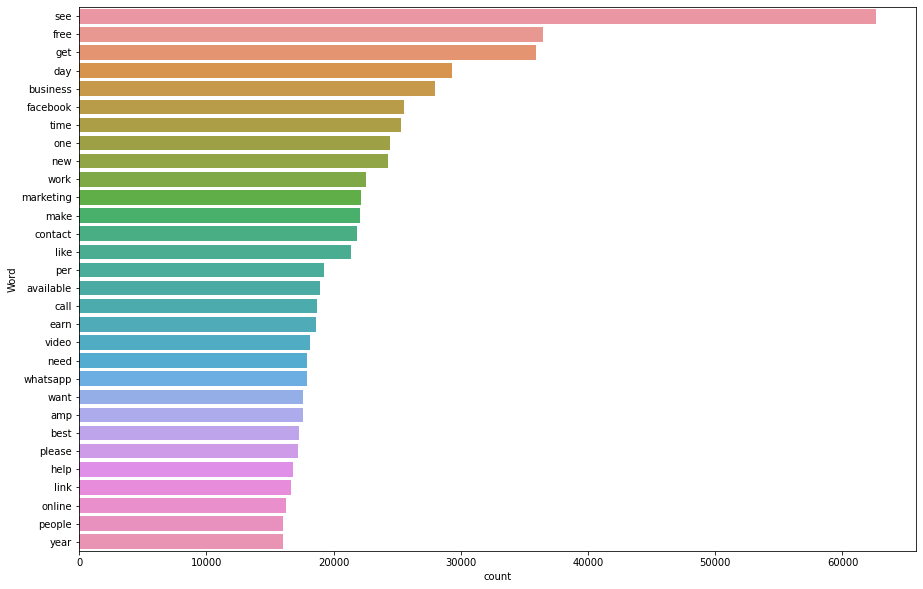

None


In [ ]:
from nltk import FreqDist

def freq_words(x,terms=30):
    all_words=' '.join([text for text in x])
    all_words=all_words.split()
    
    fdist=FreqDist(all_words)
    words_df=pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    #selecting top 30 frequent words
    d=words_df.nlargest(columns='count',n=terms)
    plt.figure(figsize=(15,10))
    ax=sns.barplot(data=d,x='count',y='word')
    ax.set(ylabel='Word')
    plt.show()
    

print(freq_words(df['Cleaned_messages']))

#### Checking 30 least occuring words in Clean Messages

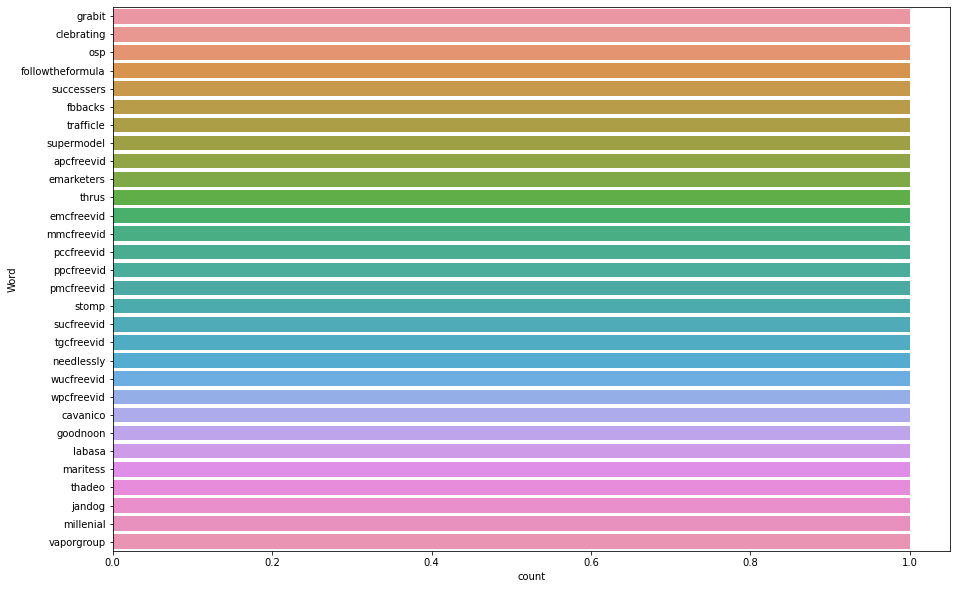

None


In [ ]:
from nltk import FreqDist

def freq_words(x,terms=30):
    all_words=' '.join([text for text in x])
    all_words=all_words.split()
    
    fdist=FreqDist(all_words)
    words_df=pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    #selecting top 30 frequent words
    d=words_df.nsmallest(columns='count',n=terms)
    plt.figure(figsize=(15,10))
    ax=sns.barplot(data=d,x='count',y='word')
    ax.set(ylabel='Word')
    plt.show()
    

print(freq_words(df['Cleaned_messages']))


#### Word Cloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords= set(STOPWORDS) 

def show_wordcloud(data, title =None): 
    wordcloud = WordCloud(background_color='white',
                          stopwords=stopwords,
                          max_words=300,
                          max_font_size=40,
                          scale=3, random_state=1).generate(str(data))
                                                                                                                                        
    fig= plt.figure(1,figsize=(15,15)) 
    plt.axis('off')
    if title:
        fig.suptitle(title,fontsize=20)
        fig.subplots_adjust(top=2.3)
        
    plt.imshow(wordcloud)
    plt.show()

Word cloud for Preprocessed_subjects


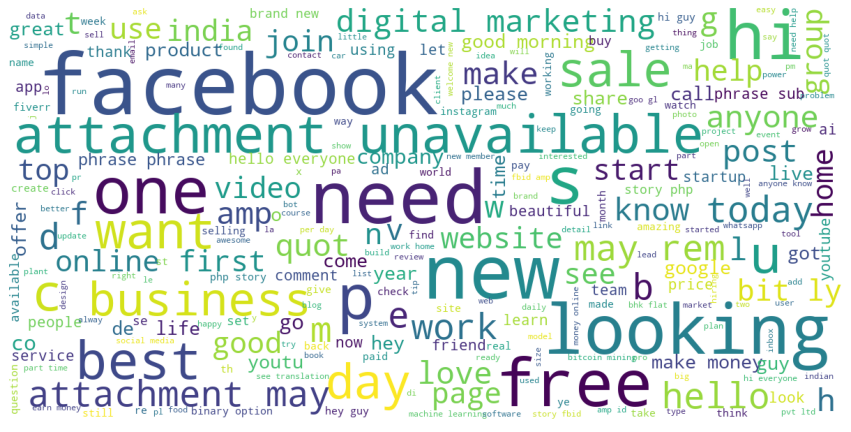

None


In [ ]:
#creating wordcloud 
print("Word cloud for Preprocessed_subjects")
print(show_wordcloud(df['Cleaned_messages']))

#### Distribution of Messages dataset with Buyer and Seller.

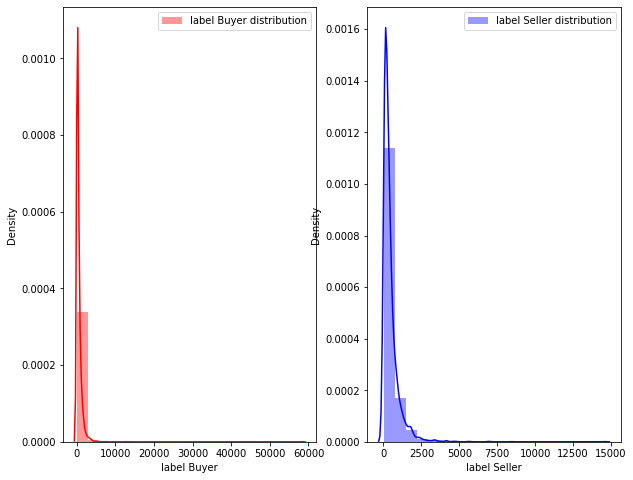

In [ ]:
# subject distribution

f,ax = plt.subplots(1,2,figsize = (10,8))

sns.distplot(df[df['Label']=='Buyer']['Cleaned_messages'].str.len(), bins=20, ax=ax[0],
             label='label Buyer distribution',color='r')
ax[0].set_xlabel('label Buyer')
ax[0].legend()


sns.distplot(df[df['Label']=='Seller']['Cleaned_messages'].str.len(), bins=20, ax=ax[1],
             label='label Seller distribution', color = 'b')
ax[1].set_xlabel('label Seller')
ax[1].legend()

plt.show()

#### Distribution of Messages dataset with Buyer & Seller and Neutral users.

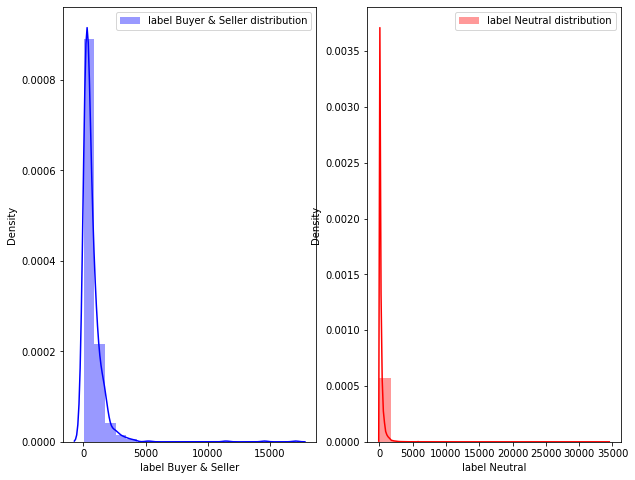

In [ ]:
# subject distribution

f,ax = plt.subplots(1,2,figsize = (10,8))

sns.distplot(df[df['Label']=='Buyer & Seller']['Cleaned_messages'].str.len(), bins=20, ax=ax[0],
             label='label Buyer & Seller distribution',color='b')
ax[0].set_xlabel('label Buyer & Seller')
ax[0].legend()


sns.distplot(df[df['Label']=='Neutral']['Cleaned_messages'].str.len(), bins=20, ax=ax[1],
             label='label Neutral distribution', color = 'r')
ax[1].set_xlabel('label Neutral')
ax[1].legend()

plt.show()

### 6. Improving Dataset for better model predicton

In [39]:
df['Label'].value_counts()/df.shape[0]*100 #percentage

Neutral           94.464759
Seller             2.554278
Buyer              2.468834
Buyer & Seller     0.512129
Name: Label, dtype: float64

In [40]:
df['Label'].value_counts()

Neutral           177999
Seller              4813
Buyer               4652
Buyer & Seller       965
Name: Label, dtype: int64

From above observation dataset is very biased about 94 percents of the messages are Neutral in Label, hence we need to make a dataset that is liable for better model building.

In [41]:
Neutral = df[df['Label'] == 'Neutral']  #selecting Neutral label database
Neutral = Neutral.sample(int(len(Neutral)*(2.8/100))) #taking only 2.8 percent of Neutral messages so that model can learn more.
Neutral.shape

(4983, 15)

In [42]:
Seller = df[df['Label'] == 'Seller']  #selecting Seller label database
Seller.shape

(4813, 15)

In [43]:
Buyer = df[df['Label'] == 'Buyer']   #selecting Buyer label database
Buyer.shape

(4652, 15)

In [44]:
Buyer_and_Seller = df[df['Label'] == 'Buyer & Seller'] #selecting Buyer & Seller label database
Buyer_and_Seller.shape

(965, 15)

In [45]:
frames = [Neutral, Seller, Buyer, Buyer_and_Seller]  #merging all the dataset
df_final = pd.concat(frames)

In [46]:
df_final.head()

,PostType,Message,NoOfLike,NoOfComment,NoOfShare,Postyear,Postmonth,Postday,Posttime,savePostyear,savePostmonth,savePostday,savePosttime,Label,Cleaned_messages
73046,IMAGE,It is my turn to shine and also enjoy the fru...,0,0,0,2018,8,16,10,2018,8,16,11,Neutral,it turn shine also enjoy fruit labour much los...
67201,IMAGE,For orders WhatsApp me on 8511526575 and get ...,0,0,0,2018,10,8,16,2018,10,8,17,Neutral,for order whatsapp get detail
131191,IMAGE,500 8mm soft plastic eggs\r Bidding starts &...,3,3,0,2018,6,11,2,2018,6,11,5,Neutral,mm soft plastic egg bidding start http rover e...
113532,IMAGE,Luxore Satin Double Bedsheets \r CASH ON DEL...,0,0,0,2018,10,25,6,2018,10,25,6,Neutral,luxore satin double bedsheets cash on delivery...
51283,TEXT,Attachment Unavailable https://www.facebook.co...,0,0,0,2018,7,26,10,2018,7,26,11,Neutral,attachment unavailable http facebook theorange...


In [47]:
df_final['Label'].value_counts()/df_final.shape[0]*100 #percentage of new dataset distribution for better model building

Neutral           32.329851
Seller            31.226886
Buyer             30.182314
Buyer & Seller     6.260949
Name: Label, dtype: float64

###Label Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_final['Label'] = le.fit_transform(df_final['Label'])
df_final['Label'].unique()

array([2, 3, 0, 1])

#### As per task requirement we have to build a model that can detect through only text dataset hence we are considering only message dataset for model building.

In [49]:
y = df_final['Label']
x = df_final['Cleaned_messages']

In [50]:
#converting text to numerical through n-gram tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


word_vectorizer=TfidfVectorizer(sublinear_tf=True,
                              strip_accents='unicode',
                              analyzer='word',
                              token_pattern=r'\w{1,}',
                              stop_words='english',
                              ngram_range=(1,3))

word_vectorizer.fit(x)
message_word_features=word_vectorizer.transform(x)

In [51]:
#vectorizing into character level
char_vectorizer=TfidfVectorizer(sublinear_tf=True,
                              strip_accents='unicode',
                              analyzer='char',
                              stop_words='english',
                              ngram_range=(2,6),
                               max_features=100000000)

char_vectorizer.fit(x)
message_char_features=char_vectorizer.transform(x)

In [52]:
message_word_features.shape, message_char_features.shape

((15413, 866743), (15413, 981942))

In [53]:
#clubbing the word and the character vector
from scipy.sparse import hstack
train_features = hstack([message_word_features, message_char_features])

### 7. SMOTE Synthetic Minority Over-sampling Technique

In [54]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
oversample = SMOTE()
train_features_smote, y_smote = oversample.fit_resample(train_features, y)

print("Shape of y\n", (y.value_counts()))
print("Shape of y_smote\n", (y_smote.value_counts()))

Shape of y
 2    4983
3    4813
0    4652
1     965
Name: Label, dtype: int64
Shape of y_smote
 2    4983
3    4983
0    4983
1    4983
Name: Label, dtype: int64


In [55]:
train_features_smote.shape, y_smote.shape

((19932, 1848685), (19932,))

In [59]:
#importing necessary libraries
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier, ElasticNet
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.svm import LinearSVC, SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score, f1_score, classification_report, roc_curve, confusion_matrix, accuracy_score

### 8. Model Building

#### 8.1 Logistic Regression

In [118]:
model = LogisticRegression()

In [83]:
for i in random.sample(range(1, 200), 10):  #checking 10 prediction to find out best random state for the model building
    x_train, x_test, y_train, y_test = train_test_split(train_features_smote, y_smote, random_state = i, test_size = 0.30)
    model.fit(x_train, y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    #if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
                
    print("At random_state:-", i)
    print("Training accuracy_score is:-", accuracy_score(pred_train, y_train)*100)
    print("Testing accuracy_score is:-", accuracy_score(pred_test, y_test)*100)
    print("\n")


At random_state:- 100
Training accuracy_score is:- 99.89965596330275
Testing accuracy_score is:- 95.90301003344482


At random_state:- 157
Training accuracy_score is:- 99.86381880733946
Testing accuracy_score is:- 95.9866220735786


At random_state:- 56
Training accuracy_score is:- 99.89965596330275
Testing accuracy_score is:- 96.37123745819397


At random_state:- 160
Training accuracy_score is:- 99.90682339449542
Testing accuracy_score is:- 96.33779264214046


At random_state:- 199
Training accuracy_score is:- 99.92115825688074
Testing accuracy_score is:- 95.81939799331104


At random_state:- 1
Training accuracy_score is:- 99.91399082568807
Testing accuracy_score is:- 96.15384615384616


At random_state:- 49
Training accuracy_score is:- 99.90682339449542
Testing accuracy_score is:- 95.68561872909699


At random_state:- 176
Training accuracy_score is:- 99.91399082568807
Testing accuracy_score is:- 96.08695652173913


At random_state:- 96
Training accuracy_score is:- 99.89965596330275
T

From above all observations model performing well at random state 160. 
Checking F1 score and other metrics at random state 160.

In [119]:
x_train, x_test, y_train, y_test = train_test_split(train_features_smote, y_smote, random_state = 160, test_size = 0.30)
model.fit(x_train, y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
#if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
                
print("At random_state:-", 160)
print("Training accuracy_score is:-", accuracy_score(pred_train, y_train)*100)
print("Testing accuracy_score is:-", accuracy_score(pred_test, y_test)*100)
print("\n")
print(confusion_matrix(pred_test, y_test) )
print("\n")
print('Classification Report')
print(classification_report(pred_test, y_test) )

At random_state:- 160
Training accuracy_score is:- 99.90682339449542
Testing accuracy_score is:- 96.33779264214046


[[1425    2   19    1]
 [   5 1481    0    2]
 [  61    0 1436   69]
 [  14   13   33 1419]]


Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1447
           1       0.99      1.00      0.99      1488
           2       0.97      0.92      0.94      1566
           3       0.95      0.96      0.96      1479

    accuracy                           0.96      5980
   macro avg       0.96      0.96      0.96      5980
weighted avg       0.96      0.96      0.96      5980



In [92]:
for value in range(2,6):
  cv = cross_val_score(model, x_train, y_train, cv = value).mean()
  print('cross_val_score', cv*100,'at cv =', value,"\n")

cross_val_score 93.25544724770643 at cv = 2 

cross_val_score 94.49538812711492 at cv = 3 

cross_val_score 95.04730504587157 at cv = 4 

cross_val_score 95.12609013354498 at cv = 5 



#### 8.2 SGDClassifier

In [93]:
model = SGDClassifier()

In [89]:
for i in random.sample(range(1, 200), 10):  #checking 10 prediction to find out best random state for the model building
    x_train, x_test, y_train, y_test = train_test_split(train_features_smote, y_smote, random_state = i, test_size = 0.30)
    model.fit(x_train, y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    #if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
                
    print("At random_state:-", i)
    print("Training accuracy_score is:-", accuracy_score(pred_train, y_train)*100)
    print("Testing accuracy_score is:-", accuracy_score(pred_test, y_test)*100)
    print("\n")


At random_state:- 6
Training accuracy_score is:- 99.98566513761467
Testing accuracy_score is:- 97.6923076923077


At random_state:- 195
Training accuracy_score is:- 99.98566513761467
Testing accuracy_score is:- 97.70903010033445


At random_state:- 62
Training accuracy_score is:- 99.99283256880734
Testing accuracy_score is:- 97.89297658862877


At random_state:- 188
Training accuracy_score is:- 99.98566513761467
Testing accuracy_score is:- 97.22408026755853


At random_state:- 109
Training accuracy_score is:- 99.99283256880734
Testing accuracy_score is:- 97.34113712374582


At random_state:- 189
Training accuracy_score is:- 99.99283256880734
Testing accuracy_score is:- 97.74247491638796


At random_state:- 138
Training accuracy_score is:- 99.97849770642202
Testing accuracy_score is:- 97.37458193979933


At random_state:- 50
Training accuracy_score is:- 99.99283256880734
Testing accuracy_score is:- 97.44147157190636


At random_state:- 10
Training accuracy_score is:- 99.98566513761467
T

From above all observations model performing well at random state 10. 
Checking F1 score and other metrics at random state 10.

In [94]:
x_train, x_test, y_train, y_test = train_test_split(train_features_smote, y_smote, random_state = 10, test_size = 0.30)
model.fit(x_train, y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
#if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
                
print("At random_state:-", 10)
print("Training accuracy_score is:-", accuracy_score(pred_train, y_train)*100)
print("Testing accuracy_score is:-", accuracy_score(pred_test, y_test)*100)
print("\n")
print(confusion_matrix(pred_test, y_test) )
print("\n")
print('Classification Report')
print(classification_report(pred_test, y_test) )

At random_state:- 10
Training accuracy_score is:- 99.98566513761467
Testing accuracy_score is:- 98.07692307692307


[[1457    4   15    0]
 [   2 1499    0    0]
 [  36    0 1442   34]
 [   0    1   23 1467]]


Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1476
           1       1.00      1.00      1.00      1501
           2       0.97      0.95      0.96      1512
           3       0.98      0.98      0.98      1491

    accuracy                           0.98      5980
   macro avg       0.98      0.98      0.98      5980
weighted avg       0.98      0.98      0.98      5980



In [96]:
for value in range(2,8):
  cv = cross_val_score(model, x_train, y_train, cv = value).mean()
  print('cross_val_score', cv*100,'at cv =', value,"\n")

cross_val_score 95.5848623853211 at cv = 2 

cross_val_score 96.65996367220522 at cv = 3 

cross_val_score 96.86783256880733 at cv = 4 

cross_val_score 97.16169099602024 at cv = 5 

cross_val_score 97.2906985703147 at cv = 6 

cross_val_score 97.41970877150122 at cv = 7 



#### 8.3 MultinomialNB

In [108]:
model = MultinomialNB()

In [109]:
for i in random.sample(range(1, 200), 10):  #checking 10 prediction to find out best random state for the model building
    x_train, x_test, y_train, y_test = train_test_split(train_features_smote, y_smote, random_state = i, test_size = 0.30)
    model.fit(x_train, y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    #if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
                
    print("At random_state:-", i)
    print("Training accuracy_score is:-", accuracy_score(pred_train, y_train)*100)
    print("Testing accuracy_score is:-", accuracy_score(pred_test, y_test)*100)
    print("\n")


At random_state:- 199
Training accuracy_score is:- 65.7325114678899
Testing accuracy_score is:- 49.23076923076923


At random_state:- 122
Training accuracy_score is:- 65.53899082568807
Testing accuracy_score is:- 48.56187290969899


At random_state:- 97
Training accuracy_score is:- 66.27006880733946
Testing accuracy_score is:- 50.48494983277592


At random_state:- 33
Training accuracy_score is:- 65.81135321100918
Testing accuracy_score is:- 48.51170568561873


At random_state:- 107
Training accuracy_score is:- 67.40969036697247
Testing accuracy_score is:- 50.819397993311036


At random_state:- 63
Training accuracy_score is:- 65.40280963302753
Testing accuracy_score is:- 48.22742474916388


At random_state:- 153
Training accuracy_score is:- 63.73996559633027
Testing accuracy_score is:- 46.47157190635451


At random_state:- 149
Training accuracy_score is:- 65.10894495412845
Testing accuracy_score is:- 47.94314381270903


At random_state:- 49
Training accuracy_score is:- 64.2990252293578


MultinomialNB not performing hence we didn't consider it.

#### 8.4 BernoulliNB

In [112]:
model = BernoulliNB()

In [113]:
for i in random.sample(range(1, 200), 10):  #checking 10 prediction to find out best random state for the model building
    x_train, x_test, y_train, y_test = train_test_split(train_features_smote, y_smote, random_state = i, test_size = 0.30)
    model.fit(x_train, y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    #if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
                
    print("At random_state:-", i)
    print("Training accuracy_score is:-", accuracy_score(pred_train, y_train)*100)
    print("Testing accuracy_score is:-", accuracy_score(pred_test, y_test)*100)
    print("\n")


At random_state:- 75
Training accuracy_score is:- 69.0223623853211
Testing accuracy_score is:- 61.30434782608696


At random_state:- 182
Training accuracy_score is:- 68.68549311926606
Testing accuracy_score is:- 61.32107023411372


At random_state:- 73
Training accuracy_score is:- 69.02952981651376
Testing accuracy_score is:- 60.953177257525084


At random_state:- 168
Training accuracy_score is:- 68.92201834862385
Testing accuracy_score is:- 61.62207357859531


At random_state:- 103
Training accuracy_score is:- 68.83600917431193
Testing accuracy_score is:- 60.66889632107023


At random_state:- 175
Training accuracy_score is:- 69.30905963302753
Testing accuracy_score is:- 61.87290969899666


At random_state:- 110
Training accuracy_score is:- 69.05819954128441
Testing accuracy_score is:- 61.8561872909699


At random_state:- 187
Training accuracy_score is:- 69.37356651376146
Testing accuracy_score is:- 61.50501672240802


At random_state:- 170
Training accuracy_score is:- 68.8503440366972

BernouliNB not performing hence we didn't consider it.

#### 8.5 DecisionTreeClassifier

In [114]:
model = DecisionTreeClassifier()

In [115]:
for i in random.sample(range(1, 200), 10):  #checking 10 prediction to find out best random state for the model building
    x_train, x_test, y_train, y_test = train_test_split(train_features_smote, y_smote, random_state = i, test_size = 0.30)
    model.fit(x_train, y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    #if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
                
    print("At random_state:-", i)
    print("Training accuracy_score is:-", accuracy_score(pred_train, y_train)*100)
    print("Testing accuracy_score is:-", accuracy_score(pred_test, y_test)*100)
    print("\n")


At random_state:- 24
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 99.86622073578594


At random_state:- 111
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 99.83277591973244


At random_state:- 172
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 99.88294314381271


At random_state:- 26
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 99.91638795986621


At random_state:- 18
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 99.78260869565217


At random_state:- 198
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 99.94983277591973


At random_state:- 137
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 99.93311036789298


At random_state:- 120
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 99.88294314381271


At random_state:- 12
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 99.91638795986621


At random_state:- 7
Training accuracy_score is:- 100.0
Test

From above all observations model performing well at random state 198. 
Checking F1 score and other metrics at random state 198.

In [116]:
x_train, x_test, y_train, y_test = train_test_split(train_features_smote, y_smote, random_state = 198, test_size = 0.30)
model.fit(x_train, y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
#if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
                
print("At random_state:-", 198)
print("Training accuracy_score is:-", accuracy_score(pred_train, y_train)*100)
print("Testing accuracy_score is:-", accuracy_score(pred_test, y_test)*100)
print("\n")
print(confusion_matrix(pred_test, y_test) )
print("\n")
print('Classification Report')
print(classification_report(pred_test, y_test) )

At random_state:- 198
Training accuracy_score is:- 100.0
Testing accuracy_score is:- 99.89966555183946


[[1494    0    0    0]
 [   1 1452    0    0]
 [   0    0 1527    1]
 [   0    1    3 1501]]


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1494
           1       1.00      1.00      1.00      1453
           2       1.00      1.00      1.00      1528
           3       1.00      1.00      1.00      1505

    accuracy                           1.00      5980
   macro avg       1.00      1.00      1.00      5980
weighted avg       1.00      1.00      1.00      5980



In [117]:
for value in range(2,6):
  cv = cross_val_score(model, x_train, y_train, cv = value).mean()
  print('cross_val_score', cv*100,'at cv =', value,"\n")

cross_val_score 99.78497706422019 at cv = 2 

cross_val_score 99.7993155208461 at cv = 3 

cross_val_score 99.87098623853213 at cv = 4 

cross_val_score 99.8423195910049 at cv = 5 



#### From above 5 models 3 models shows good results as follows below:-

In [ ]:
# models                 accuracy_score_training  accuracy_score_testing    CV score        CV state    Differences in test and CV

#1. LogisticRegression     99.90682339449542         96.33779264214046      95.12609013354498      5      1.2117025085954793
#2. SGDClassifier          99.98566513761467         98.07692307692307      97.41970877150122      7      0.6572143054218458
#3. DecisionTreeClassifier 100.00                    99.89966555183946      99.87098623853213      4      0.0286793133073359
#4. MultinomialNB          Not considerable
#5. BernouliNB             Not considerable

Ultimately from abover 5 models Decision Tree classifier shows great results with lesser difference in test and cv score hence we can consider it for final model building.

### 9. Final Model

#### 9.1 Hyper Parameter Tuning of final model

In [172]:
model = DecisionTreeClassifier()
param = {'criterion':['gini','entropy'], 'splitter':['best', 'random']}

#param grid takes more than 12 hours to extract exact optimized parameter hence I used only two parameters 
#as model performing well in their normal parameters

gd = GridSearchCV(model, param_grid=param, cv = 4)
gd.fit(train_features_smote, y_smote)
gd.best_params_


{'criterion': 'entropy', 'splitter': 'best'}

In [61]:
model = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best')
x_train, x_test, y_train, y_test = train_test_split(train_features_smote, y_smote, random_state = 198, test_size = 0.30)
model.fit(x_train, y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print("At random state", 198 , "model giving best accuracy score","\n")
Train_accuracy = accuracy_score(pred_train, y_train)
Test_accuracy = accuracy_score(pred_test, y_test)
print('Training accuracy:- ', Train_accuracy*100)
print('Testing accuracy:- ', Test_accuracy*100)
print("\n")
print('--------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(pred_test, y_test) )
print("\n")
print('Classification Report')
print(classification_report(pred_test, y_test) )   # at random state 198 model shows best accuracy

At random state 198 model giving best accuracy score 

Training accuracy:-  100.0
Testing accuracy:-  99.94983277591973


--------------------------------------
Confusion Matrix
[[1494    0    0    0]
 [   1 1453    0    0]
 [   0    0 1529    1]
 [   0    0    1 1501]]


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1494
           1       1.00      1.00      1.00      1454
           2       1.00      1.00      1.00      1530
           3       1.00      1.00      1.00      1502

    accuracy                           1.00      5980
   macro avg       1.00      1.00      1.00      5980
weighted avg       1.00      1.00      1.00      5980



#### Using Predict Proba function for finding accuracy according to target variable

In [83]:
final_pred_prob = model.predict_proba(x_test)[:,1]

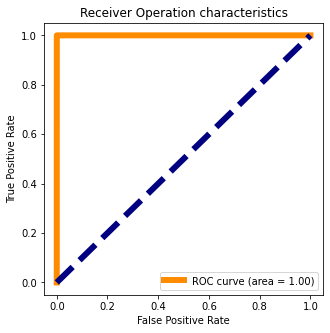

In [85]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresolds = roc_curve(y_test, final_pred_prob, pos_label= 1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (5,5))
plt.plot(fpr, tpr, color = 'darkorange', lw = 6, label = "ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1], color = 'navy', lw = 6, linestyle = '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operation characteristics")
plt.legend(loc = "lower right")
plt.show()

Model performing almost 100 percent.

### 10. Deploy Model

In [86]:
filename = "merchant.pkl"
pickle.dump(model, open(filename, 'wb'))
pickle.dump(char_vectorizer, open('char_vectorizer.pkl','wb'))
pickle.dump(word_vectorizer, open('word_vectorizer.pkl','wb'))

In [87]:
load = pickle.load(open('merchant.pkl', 'rb'))
result = load.score(x_test, y_test)
print(result)

0.9994983277591973


## Final Deployed Model for prediction real world data

In [10]:
#import necessary requirement libraries
import pickle
from sklearn.pipeline import make_pipeline
import re
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
import warnings
warnings.filterwarnings("ignore")
from nltk.stem import PorterStemmer
import string
ps = PorterStemmer()
from scipy.sparse import hstack

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\PREETI\AppData\Roaming\nltk_data...
[nltk_data] 

In [3]:
#import trained pkl models
tfidf = pickle.load(open('word_vectorizer.pkl','rb'))
tfidfchar = pickle.load(open('char_vectorizer.pkl','rb'))
load = pickle.load(open('merchant.pkl', 'rb'))

In [11]:
#transforming text into machine format
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear() 
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

### Final Model for Prediction

In [16]:
def prediction():
    sentence = input("Enter a Sentence:-\n")
    text = transform_text(sentence)
    stacked_word = hstack([tfidf.transform([text]),tfidfchar.transform([text])])
    result = load.predict(stacked_word)[0]
    if result == 2:
        print("\n-------Neutral---------")
    elif result == 0:
        print("\n--------Buyer-----------")
    elif result == 3:
        print("\n--------Seller-----------")
    else:
        print("\n----Buyer & Seller--------")  
    
      

In [17]:
prediction()

Enter a Sentence:-
I want to buy a car

--------Buyer-----------


In [18]:
prediction()

Enter a Sentence:-
Can anyone help me to sell my old car

--------Seller-----------


In [19]:
prediction()

Enter a Sentence:-
I want to sell my old mobile and want to buy new one.

----Buyer & Seller--------


In [20]:
prediction()

Enter a Sentence:-
Hey how are you?

-------Neutral---------


In [21]:
prediction()

Enter a Sentence:-
Hello what’s going on?

-------Neutral---------


#### I tried also deep learning model as well but there accuracy score is less accurate than final classic algorithm model. 